# Patient Survival Prediction

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

E:\Programs\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in data from a CSV file and store it in a pandas DataFrame
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [141]:
df.shape

(91713, 80)

In [142]:
df.columns

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
df.shape

(91713, 85)

In [6]:
# Drop one or more columns by their names
columns_to_drop = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'Unnamed: 83']
df = df.drop(columns=columns_to_drop)

In [7]:
df.isnull().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [8]:
# Iterate through columns
for column in df.columns:
    if df[column].dtype == 'float64':
        # Handle numeric columns (replace NaN with mean)
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Handle categorical columns (replace NaN with mode)
        df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [10]:
df["hospital_death"]

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

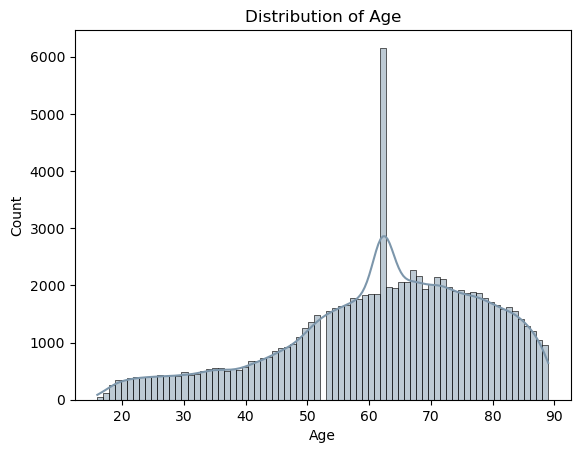

In [11]:
# Create a histogram with a kernel density estimate for the 'age' column
sns.histplot(df['age'], kde=True, color="#7C96AB")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Age")

# Display the plot
plt.show()

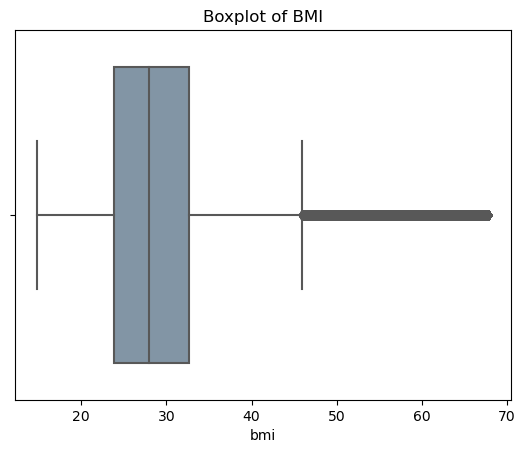

In [12]:
# Create a boxplot for the 'bmi' column
sns.boxplot(x=df['bmi'], color="#7C96AB")

# Add labels to the x-axis
plt.xlabel("bmi")

# Set the title of the plot
plt.title("Boxplot of BMI")

# Display the plot
plt.show() 

In [13]:
# Count the occurrences of each gender category
df['gender'].value_counts()

M    49494
F    42219
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c5d21100>,
 [Text(-0.5972255302775132, -0.9237541155441439, 'Male'),
  Text(0.5972256167656136, 0.9237540596278496, 'Female')],
 [Text(-0.3257593801513708, -0.5038658812058966, '54.0%'),
  Text(0.3257594273266983, 0.5038658507060997, '46.0%')])

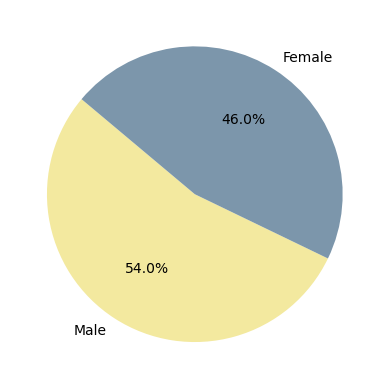

In [14]:
# Define labels for the pie chart
labels = ['Male', 'Female']

# Define sizes for each segment of the pie chart
sizes = [49469, 42219]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [15]:
# Group by 'gender' and count 'hospital_death'
df.groupby(['gender']).agg({'hospital_death': 'count'})

,hospital_death
gender,
F,42219
M,49494


([<matplotlib.patches.Wedge at 0x1f6c5d6e7f0>,
 [Text(-0.5972255302775132, -0.9237541155441439, 'Male'),
  Text(0.5972256167656136, 0.9237540596278496, 'Female')],
 [Text(-0.3257593801513708, -0.5038658812058966, '54.0%'),
  Text(0.3257594273266983, 0.5038658507060997, '46.0%')])

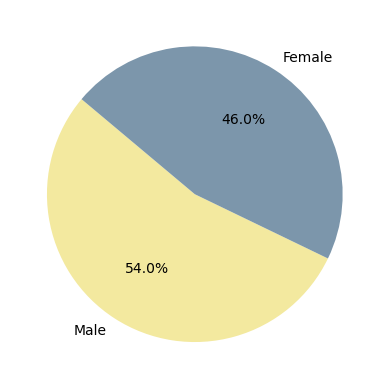

In [16]:
# Define labels for the pie chart
labels = ['Male', 'Female']

# Define sizes for each segment of the pie chart
sizes = [49469, 42219]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [17]:
# How many times each unique value appears in elective_surgery column
df['elective_surgery'].value_counts()

0    74862
1    16851
Name: elective_surgery, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c5dc5250>,
 [Text(-1.0919695680298986, 0.13267427217285543, 'Yes'),
  Text(1.0919695742408282, -0.13267422105407023, 'No')],
 [Text(-0.5956197643799446, 0.07236778482155751, '18.4%'),
  Text(0.5956197677677244, -0.07236775693858376, '81.6%')])

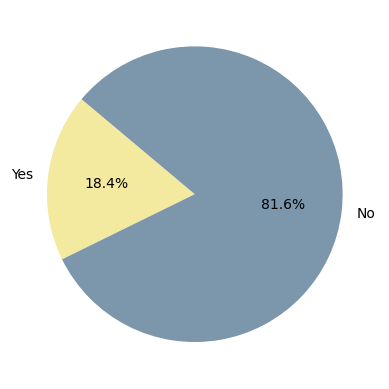

In [18]:
# Define labels for the pie chart
labels = ['Yes', 'No']

# Define sizes or proportions for each category
sizes = [16851, 74862]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [19]:
# How many times each unique value appears in ethnicity column
df['ethnicity'].value_counts()

Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

Text(0.5, 1.0, 'Custom Color Bar Plot')

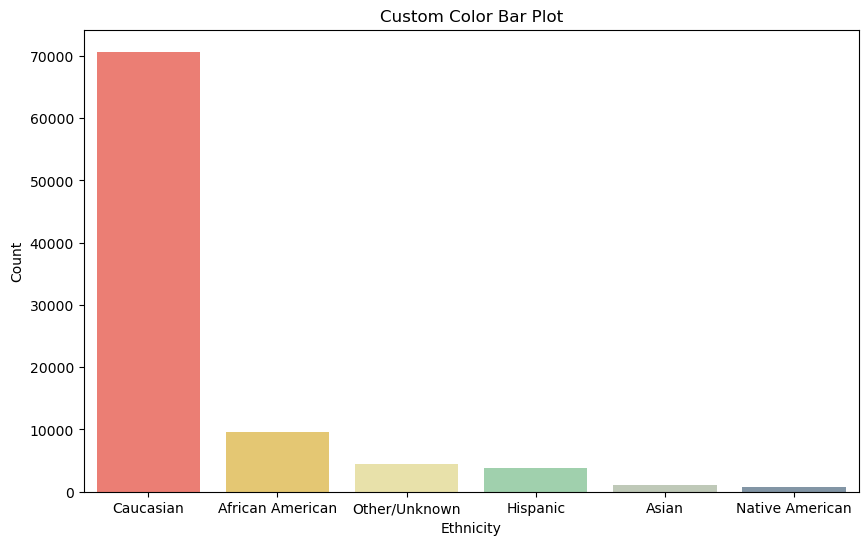

In [20]:
# Custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']
value_counts=[70684, 9547, 4374, 3796, 1129, 788]
labels = ['Caucasian', 'African American', 'Other/Unknown', 'Hispanic', 'Asian', 'Native American']

# Create a DataFrame
plt.figure(figsize=(10, 6))
data = pd.DataFrame({'Ethnicity': labels, 'Count': value_counts})

# Create a bar plot using Seaborn with the custom color palette
sns.barplot(x='Ethnicity', y='Count', data=data, palette=custom_palette)

# Add labels and a title
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Custom Color Bar Plot')

In [21]:
# Group by 'ethnicity' and count 'hospital_death'
df.groupby(['ethnicity']).agg({'hospital_death': 'count'})

,hospital_death
ethnicity,
African American,9547
Asian,1129
Caucasian,72079
Hispanic,3796
Native American,788
Other/Unknown,4374


Text(0.5, 1.0, 'Hospital Deaths by Ethnicity')

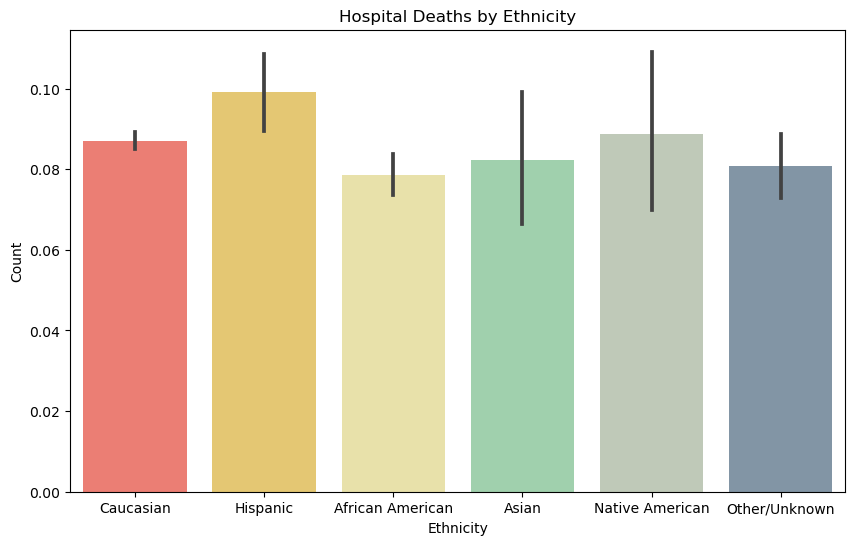

In [22]:
# Define a custom color palette for the bar plot
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='ethnicity', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('Ethnicity')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by Ethnicity')

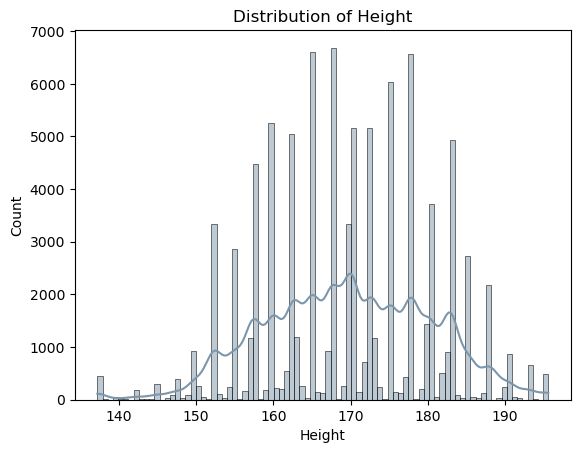

In [23]:
# Create a histogram with a kernel density estimate for the 'height' column
sns.histplot(df['height'], kde=True, color="#7C96AB")

# Label the x-axis
plt.xlabel("Height")

# Label the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Height")

# Display the plot
plt.show()

In [24]:
# How many times each unique value appears in icu_admit_source column
df['icu_admit_source'].value_counts()

Accident & Emergency         54172
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

Text(0, 0.5, 'Count')

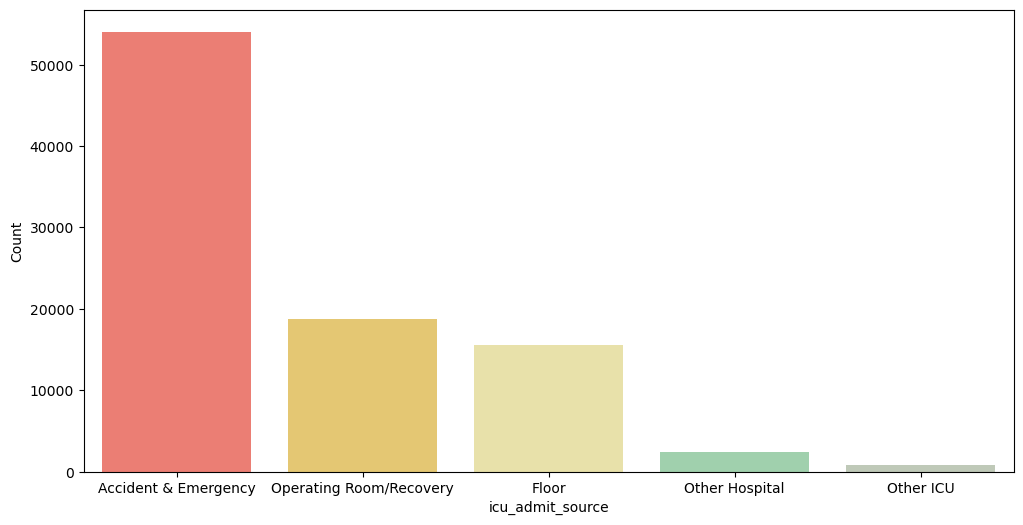

In [25]:
# Custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5']

# Values and labels for the bar plot
value_counts = [54060, 18713, 15611, 2358, 859]
labels = ['Accident & Emergency', 'Operating Room/Recovery', 'Floor', 'Other Hospital', 'Other ICU']

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a DataFrame from the values and labels
data = pd.DataFrame({'icu_admit_source': labels, 'Count': value_counts})

# Create a bar plot using Seaborn with the custom color palette
sns.barplot(x='icu_admit_source', y='Count', data=data, palette=custom_palette)

# Add labels to the x-axis and y-axis
plt.xlabel('icu_admit_source')
plt.ylabel('Count')

In [26]:
# How many times each unique value appears in icu_stay_type column
df['icu_stay_type'].value_counts()

admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c6efb520>,
 [Text(0.6944371656244325, -0.8530867617068645, 'admit'),
  Text(-0.677946064411768, 0.8662500411247294, 'Transfer'),
  Text(-0.828931435720883, 0.7230993533904699, 'Readmit')])

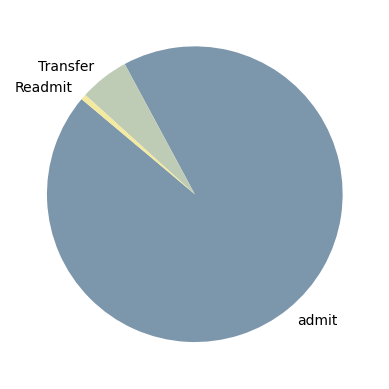

In [27]:
# Define labels for the pie chart
labels = ['admit', 'Transfer', 'Readmit']

# Define sizes or proportions for each category
sizes = [86183, 4970, 560]

# Define colors for the pie chart segments
colors = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, startangle=140)

In [28]:
# How many times each unique value appears in icu_type column
icu_type_counts = df['icu_type'].value_counts()

Text(0.5, 1.0, 'Count of Each ICU Type')

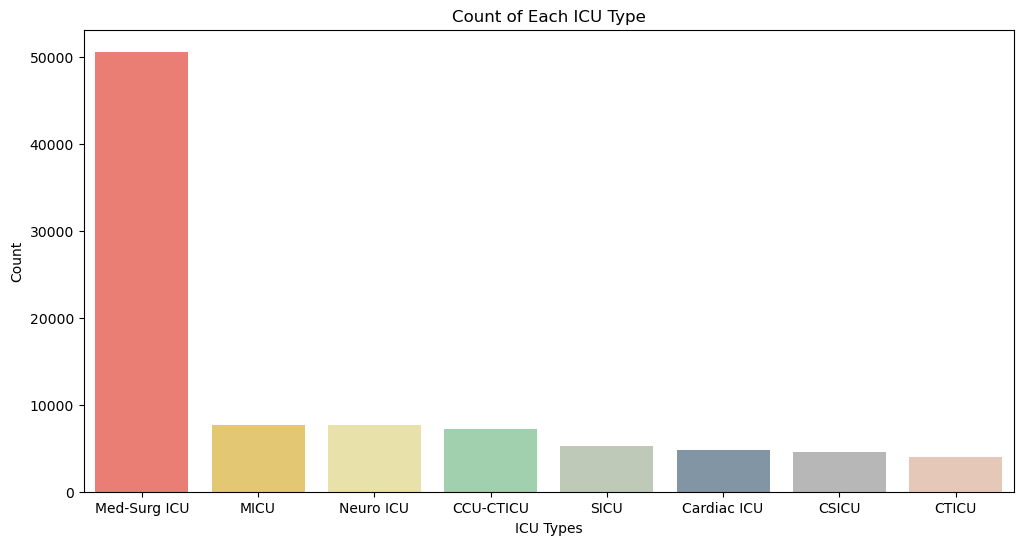

In [29]:
# Custom color palette with color names
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB', '#B7B7B7', '#EDC6B1']

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(x=icu_type_counts.index, y=icu_type_counts.values, data=df, palette=custom_palette)

# Add labels to the x-axis and y-axis
plt.xlabel('ICU Types')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of Each ICU Type')

Text(0.5, 1.0, 'Boxplot of pre_icu_los_days')

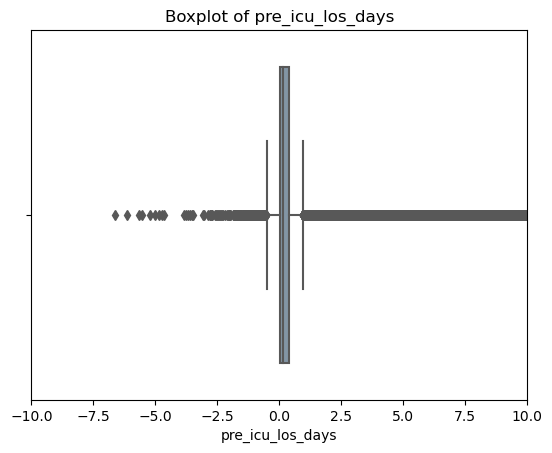

In [30]:
# Set the x-axis and y-axis limits to make the range smaller
plt.xlim(-10, 10)  # Set the x-axis limits (adjust the values as needed)
plt.ylim(0, 1000)  # Set the y-axis limits (adjust the values as needed)

# Create a boxplot for the 'pre_icu_los_days' data
sns.boxplot(x=df['pre_icu_los_days'], color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("pre_icu_los_days")

# Set the title of the plot
plt.title("Boxplot of pre_icu_los_days")

Text(0.5, 1.0, 'Distribution of Weights')

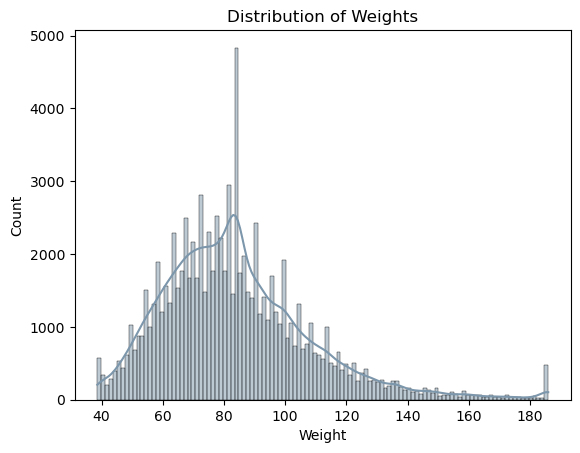

In [31]:
# Create a histogram with a kernel density estimate for the 'weight' column
sns.histplot(df['weight'], kde=True, color='#7C96AB')

# Label the x-axis
plt.xlabel("Weight")

# Label the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Weights")

Text(0.5, 1.0, 'Distribution of APACHE 2 Diagnoses')

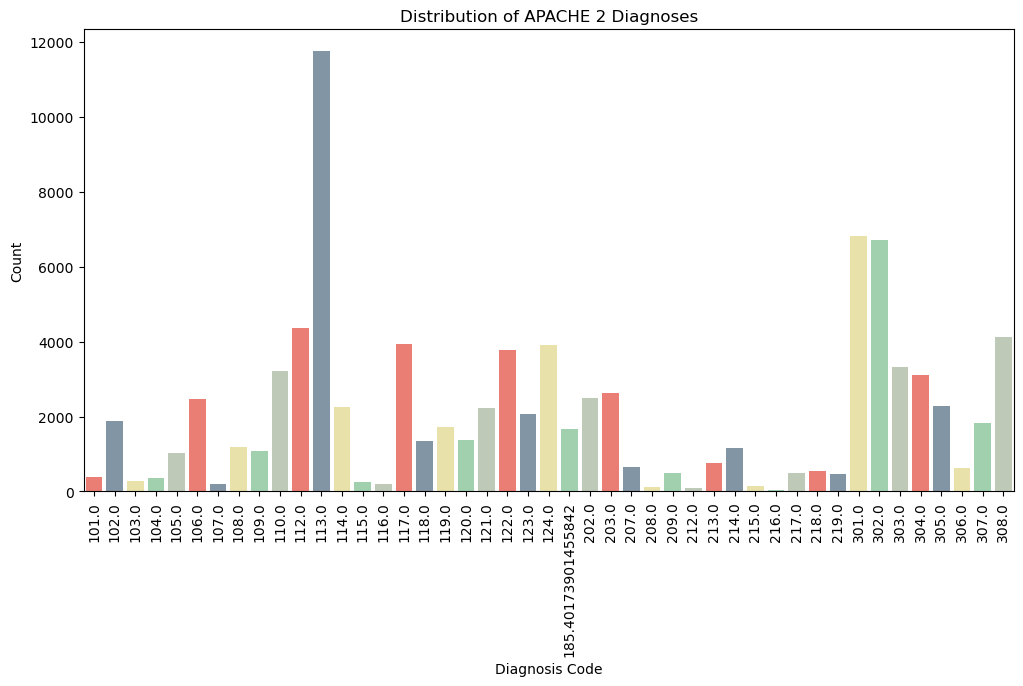

In [32]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#7C96AB', '#F3E99F', '#98D8AA', '#BFCCB5']

# Create a count plot (bar plot) for 'apache_2_diagnosis' with the custom color palette
sns.countplot(data=df, x='apache_2_diagnosis', palette=custom_palette)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Label the x-axis
plt.xlabel('Diagnosis Code')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Distribution of APACHE 2 Diagnoses')

Text(0.5, 1.0, 'Distribution of APACHE 3J Diagnoses')

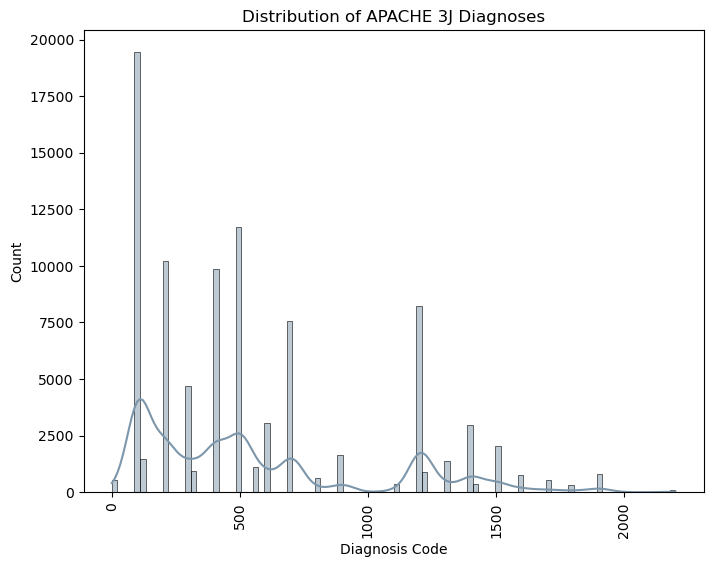

In [33]:
# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Create a histogram with a kernel density estimate (KDE) for the 'apache_3j_diagnosis' column
sns.histplot(data=df, x='apache_3j_diagnosis', kde=True, color='#7C96AB')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add labels to the x-axis and y-axis
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Distribution of APACHE 3J Diagnoses')

Text(0.5, 1.0, 'Relationship between Hospital Death and APACHE 3J Diagnosis')

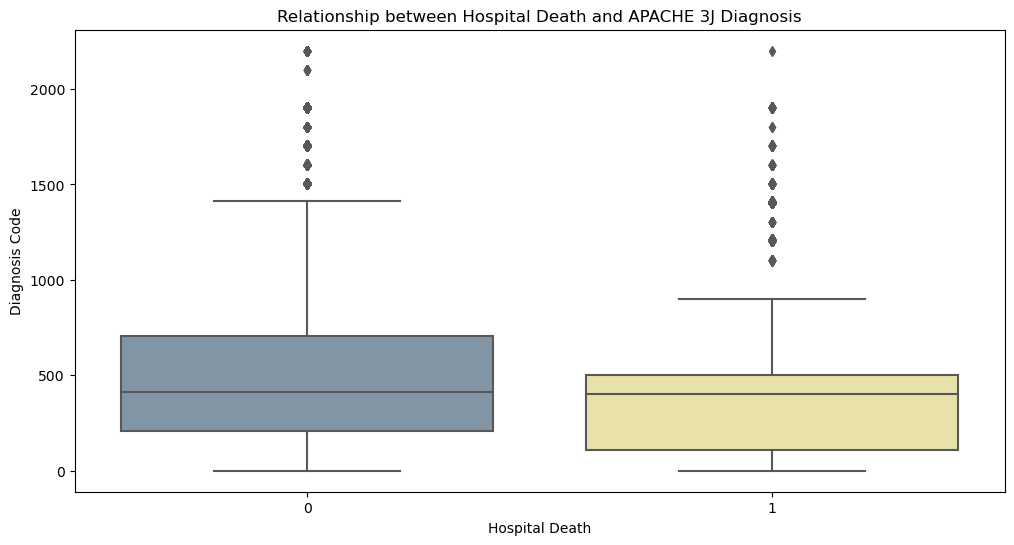

In [34]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ['#7C96AB', '#F3E99F']

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a box plot to visualize the relationship between 'hospital_death' and 'apache_3j_diagnosis'
sns.boxplot(data=df, x='hospital_death', y='apache_3j_diagnosis', palette=custom_palette)

# Label the x-axis
plt.xlabel('Hospital Death')

# Label the y-axis
plt.ylabel('Diagnosis Code')

# Set the title of the plot
plt.title('Relationship between Hospital Death and APACHE 3J Diagnosis')

In [35]:
# How many times each unique value appears in apache_post_operative column
df['apache_post_operative'].value_counts()

0    73269
1    18444
Name: apache_post_operative, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c72704f0>,
 [Text(0.2624053165861489, -1.0682431604402263, 'No'),
  Text(-0.2624054166022895, 1.0682431358720632, 'Yes')],
 [Text(0.14313017268335393, -0.5826780875128507, '79.9%'),
  Text(-0.14313022723761243, 0.5826780741120344, '20.1%')])

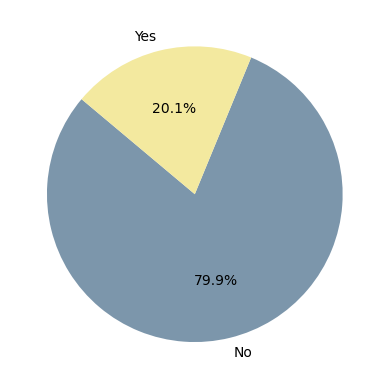

In [36]:
# Define labels for the pie chart
labels = ['No', 'Yes']

# Define sizes or proportions for each category
sizes = [73269, 18444]

# Define colors for the pie chart segments
colors = ["#7C96AB", "#F3E99F"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [37]:
# How many times each unique value appears in arf_apache column
df['arf_apache'].value_counts()

0.000000    88452
1.000000     2546
0.027979      715
Name: arf_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of arf_apache')

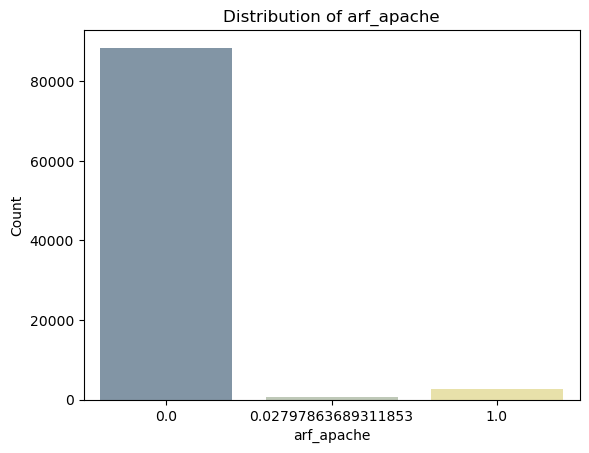

In [38]:
# Define a list of unique values in the 'arf_apache' column
arf_apache_values = [0.000000, 1.000000, 0.027979]

# Define the corresponding counts for each value
value_counts = [88452, 2546, 15611, 715]

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a count plot (bar plot) to visualize the distribution of 'arf_apache' with the custom color palette
sns.countplot(data=df, x='arf_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("arf_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of arf_apache")

In [39]:
# How many times each unique value appears in arf_apache column
df['gcs_eyes_apache'].value_counts()

4.000000    62995
3.000000    13863
1.000000     8274
2.000000     4680
3.465049     1901
Name: gcs_eyes_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of gcs_eyes_apache')

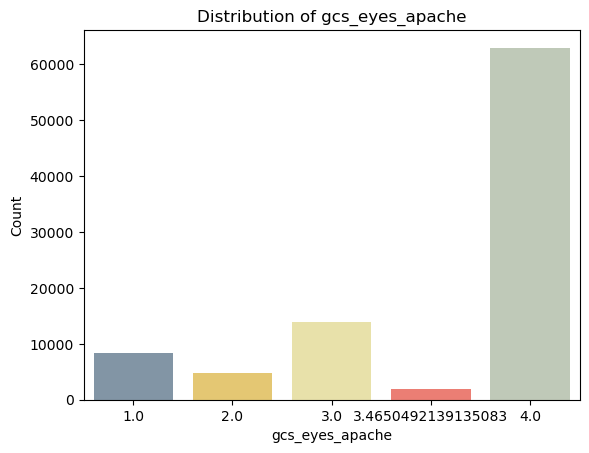

In [40]:
# Define a list of unique values in the 'gcs_eyes_apache' column
gcs_eyes_apache_values = [1.000000, 2.000000, 3.000000, 3.465049, 4.000000]

# Define the corresponding counts for each value
value_counts = [8274, 4680, 13863, 1901, 62995]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#7C96AB', '#F7D060', '#F3E99F', '#FF6D60', '#BFCCB5']

# Create a count plot (bar plot) to visualize the distribution of 'gcs_eyes_apache' with the custom color palette
sns.countplot(data=df, x='gcs_eyes_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("gcs_eyes_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_eyes_apache")

In [41]:
# How many times each unique value appears in arf_apache column
df['gcs_motor_apache'].value_counts()

6.000000    70960
5.000000     7982
1.000000     5543
4.000000     4494
5.471195     1901
3.000000      524
2.000000      309
Name: gcs_motor_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of gcs_motor_apache')

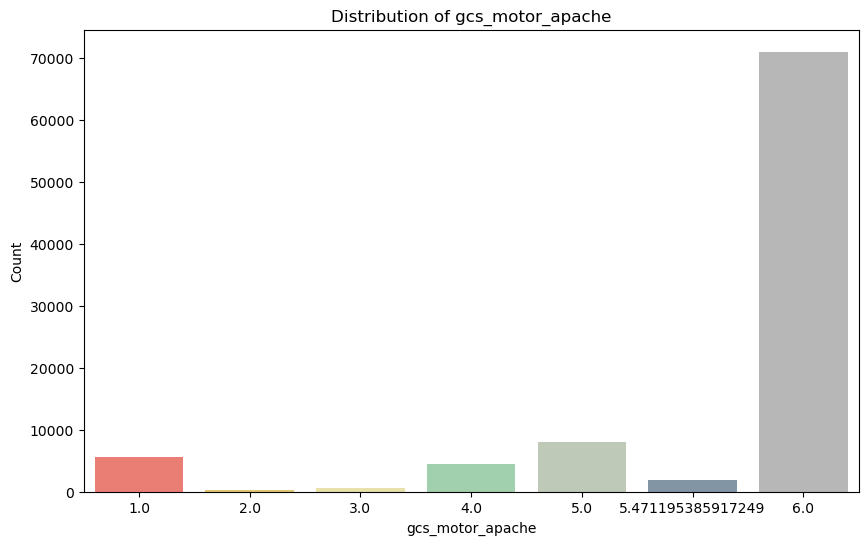

In [42]:
# Define a list of unique values in the 'gcs_motor_apache' column
gcs_motor_apache_values = [1.000000, 2.000000, 3.000000, 4.000000, 5.000000, 5.471195, 6.000000]

# Define the corresponding counts for each value
value_counts = [5543, 309, 524, 4494, 7982, 1901, 70960]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB', '#B7B7B7']

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot (bar plot) to visualize the distribution of 'gcs_motor_apache' with the custom color palette
sns.countplot(data=df, x='gcs_motor_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("gcs_motor_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_motor_apache")

In [43]:
# How many times each unique value appears in gcs_unable_apache column
df['gcs_unable_apache'].value_counts()

0.000000    89812
0.009528     1037
1.000000      864
Name: gcs_unable_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of gcs_unable_apache')

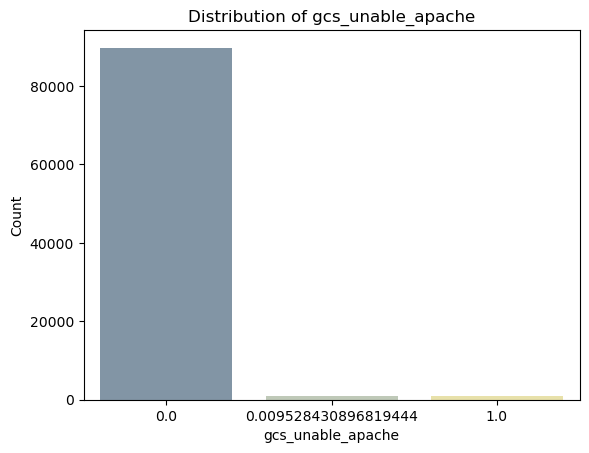

In [44]:
# Define a list of unique values in the 'gcs_unable_apache' column
gcs_unable_apache = [0.000000, 0.009528, 1.000000]

# Define the corresponding counts for each value
value_counts = [89812, 1037, 864]

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a count plot (bar plot) to visualize the distribution of 'gcs_unable_apache' with the custom color palette
sns.countplot(data=df, x='gcs_unable_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("gcs_unable_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_unable_apache")

In [45]:
# How many times each unique value appears in gcs_verbal_apache column
df['gcs_verbal_apache'].value_counts()

5.000000    56909
1.000000    16741
4.000000    10947
3.000000     3275
2.000000     1940
3.994778     1901
Name: gcs_verbal_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of gcs_verbal_apache')

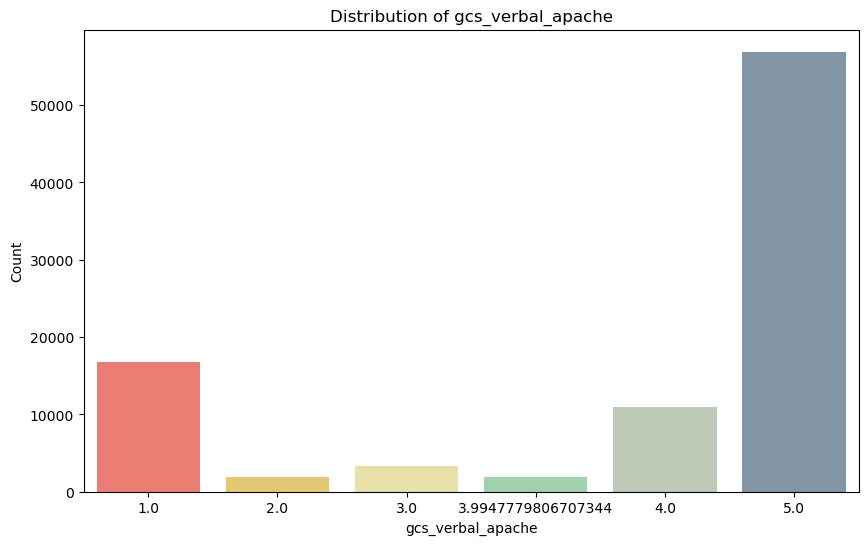

In [46]:
# Define a list of unique values in the 'gcs_verbal_apache' column
gcs_verbal_apache_values = [1.000000, 2.000000, 3.000000, 3.994778, 4.000000, 5.000000]

# Define the corresponding counts for each value
value_counts = [16741, 1940, 3275, 1901, 10947, 56909]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot (bar plot) to visualize the distribution of 'gcs_verbal_apache' with the custom color palette
sns.countplot(data=df, x='gcs_verbal_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("gcs_verbal_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_verbal_apache")

In [47]:
# How many times each unique value appears in heart_rate_apache column
value_counts = df['heart_rate_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Heart Rate (apache)')

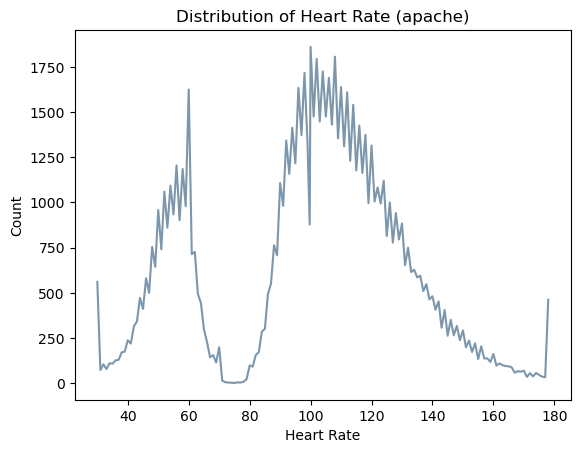

In [48]:
# Create a line plot to visualize the distribution of heart rate values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Heart Rate")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Heart Rate (apache)")

In [49]:
# How many times each unique value appears in intubated_apache column
value_counts = df['intubated_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Intubated Apache')

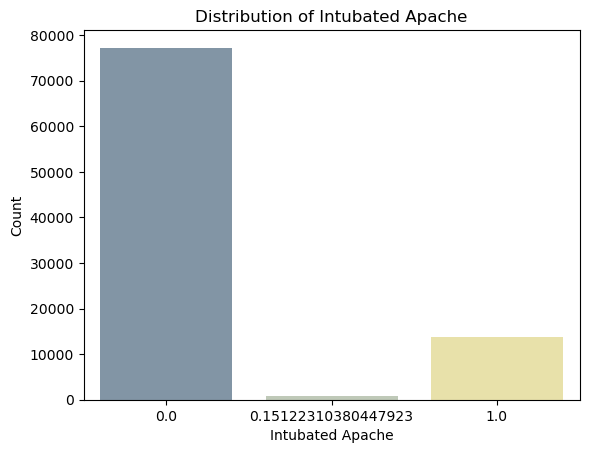

In [50]:
# Create a count plot (bar plot) to visualize the distribution
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]
sns.countplot(data=df, x='intubated_apache', palette=custom_palette)

# Add labels and a title
plt.xlabel("Intubated Apache")
plt.ylabel("Count")
plt.title("Distribution of Intubated Apache")

Text(0.5, 1.0, 'Distribution of Heart Rate by Hospital Death')

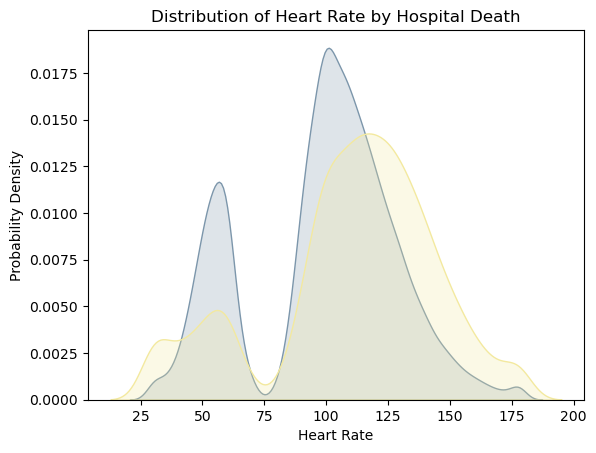

In [51]:
# Create a KDE (Kernel Density Estimate) plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['heart_rate_apache'], label='Survived', shade=True, color='#7C96AB')

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['heart_rate_apache'], label='Not Survived', shade=True, color='#F3E99F')

# Add a label to the x-axis
plt.xlabel('Heart Rate')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Heart Rate by Hospital Death')

In [52]:
# How many times each unique value appears in map_apache column
value_counts = df['map_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Map (apache)')

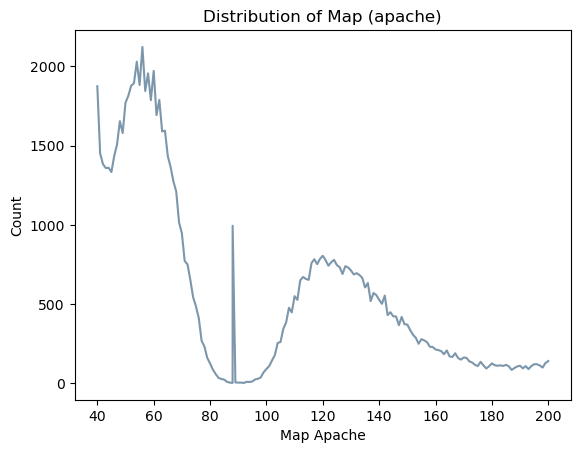

In [53]:
# Create a line plot to visualize the distribution of Map Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Map Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Map (apache)")

Text(0.5, 1.0, 'Distribution of Mean Arterial Pressure by Hospital Death')

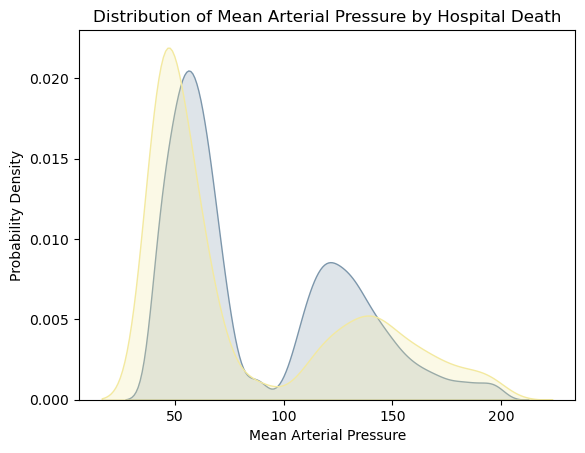

In [54]:
# Create a KDE (Kernel Density Estimate) plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['map_apache'], label='Survived', shade=True, color='#7C96AB')

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['map_apache'], label='Not Survived', shade=True, color='#F3E99F')

# Add a label to the x-axis
plt.xlabel('Mean Arterial Pressure')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Mean Arterial Pressure by Hospital Death')

In [55]:
# How many times each unique value appears in resprate_apache column
value_counts = df['resprate_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Resprat (apache)')

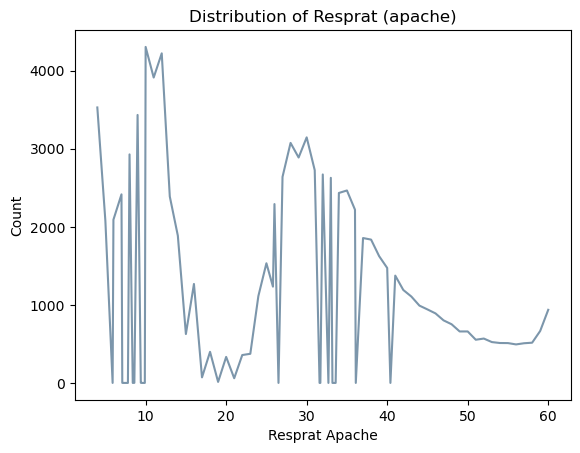

In [56]:
# Create a line plot to visualize the distribution of Resprat Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Resprat Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Resprat (apache)")

Text(0.5, 1.0, 'Distribution of Respiratory Rate by Hospital Death')

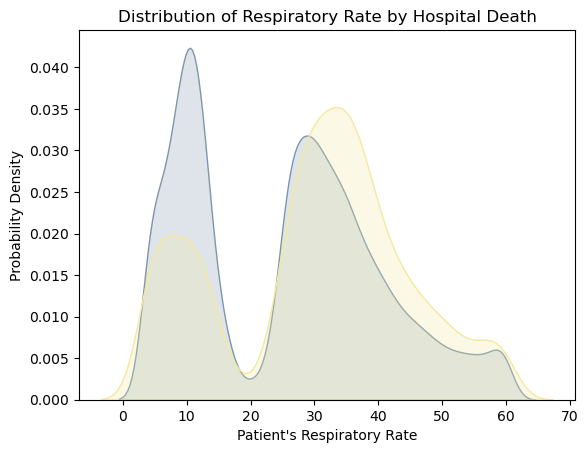

In [57]:
# Create a KDE (Kernel Density Estimate) plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['resprate_apache'], label='Survived', shade=True, color='#7C96AB')

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['resprate_apache'], label='Not Survived', shade=True, color='#F3E99F')

# Add a label to the x-axis
plt.xlabel('Patient\'s Respiratory Rate')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Respiratory Rate by Hospital Death')

In [58]:
# How many times each unique value appears in temp_apache column
value_counts = df['temp_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Temp (apache)')

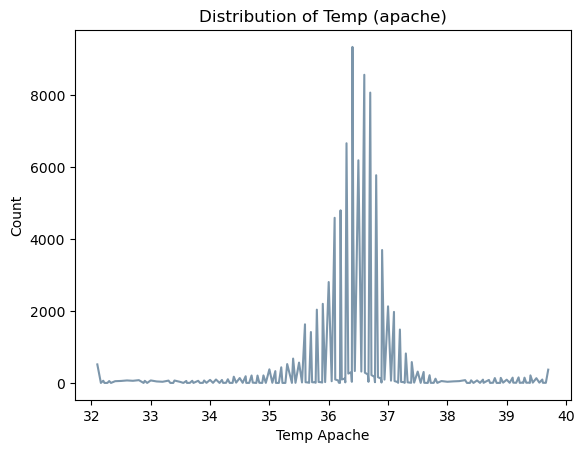

In [59]:
# Create a line plot to visualize the distribution of Temp Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Temp Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Temp (apache)")

Text(0.5, 1.0, 'Distribution of Body Temperature by Hospital Death')

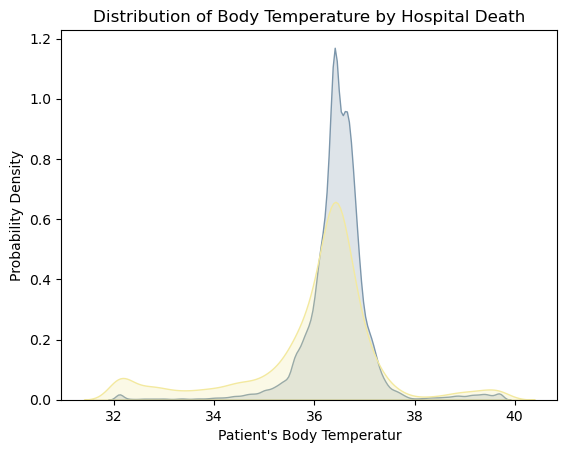

In [60]:
# Create a KDE (Kernel Density Estimate) plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['temp_apache'], label='Survived', shade=True, color='#7C96AB')

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['temp_apache'], label='Not Survived', shade=True, color='#F3E99F')

# Add a label to the x-axis
plt.xlabel('Patient\'s Body Temperatur')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Body Temperature by Hospital Death')

In [61]:
# How many times each unique value appears in ventilated_apache column
df['ventilated_apache'].value_counts()

0.000000    61358
1.000000    29640
0.325721      715
Name: ventilated_apache, dtype: int64

Text(0.5, 1.0, 'Distribution of Ventilated Apache')

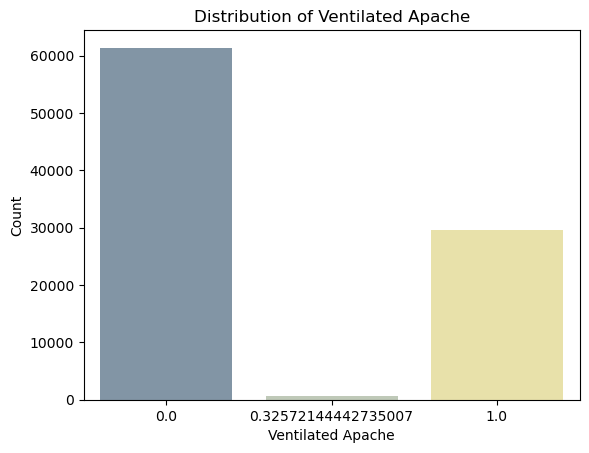

In [62]:
# Create a count plot (bar plot) to visualize the distribution of Ventilated Apache values
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]
sns.countplot(data=df, x='ventilated_apache', palette=custom_palette)

# Add a label to the x-axis
plt.xlabel("Ventilated Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Ventilated Apache")

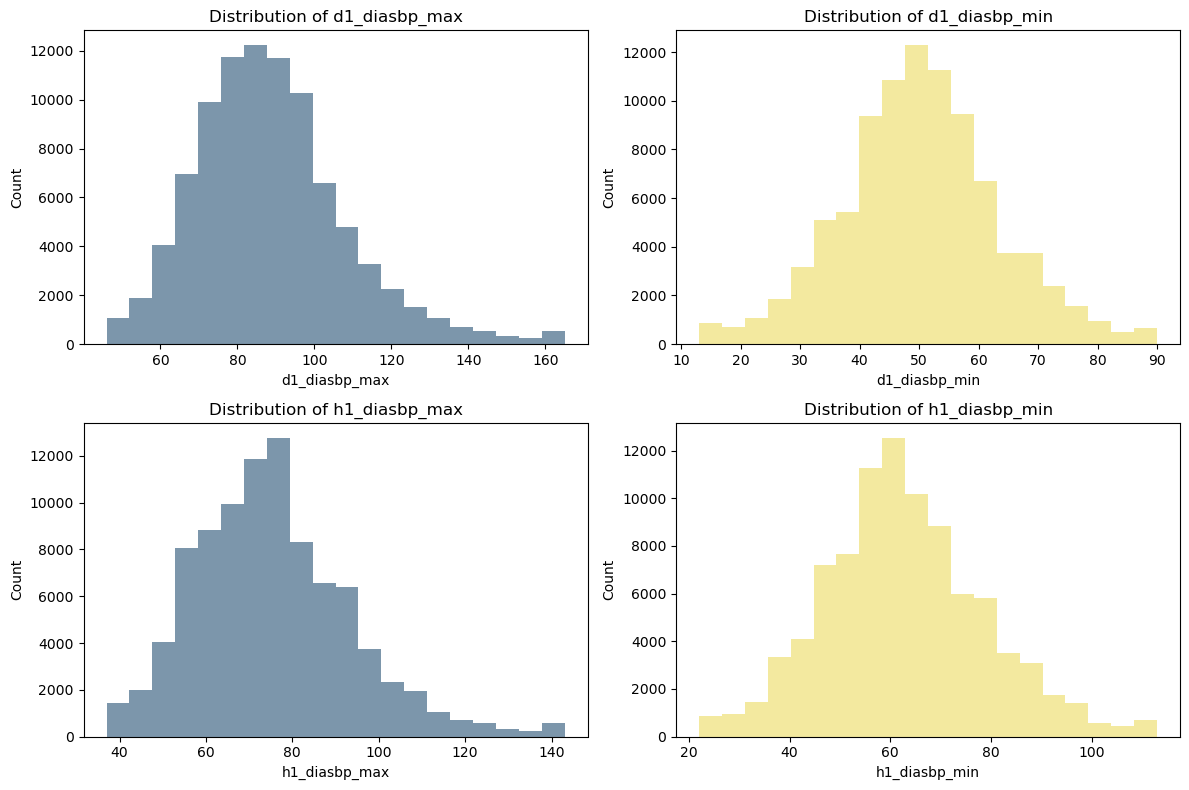

In [63]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_diasbp_max in the first subplot
axes[0, 0].hist(df['d1_diasbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_diasbp_max')
axes[0, 0].set_xlabel('d1_diasbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_diasbp_min in the second subplot
axes[0, 1].hist(df['d1_diasbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_diasbp_min')
axes[0, 1].set_xlabel('d1_diasbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_diasbp_max in the third subplot
axes[1, 0].hist(df['h1_diasbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_diasbp_max')
axes[1, 0].set_xlabel('h1_diasbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_diasbp_min in the third subplot
axes[1, 1].hist(df['h1_diasbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_diasbp_min')
axes[1, 1].set_xlabel('h1_diasbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

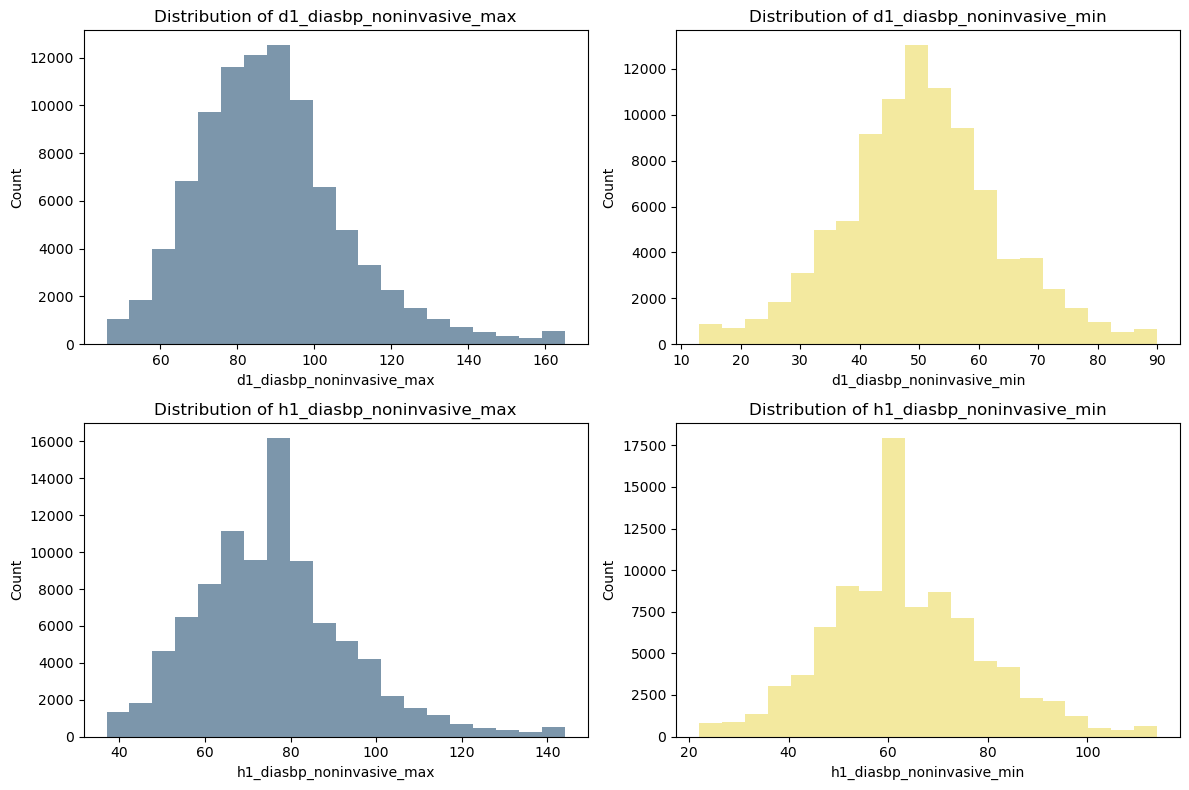

In [64]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_diasbp_noninvasive_max in the first subplot
axes[0, 0].hist(df['d1_diasbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_diasbp_noninvasive_max')
axes[0, 0].set_xlabel('d1_diasbp_noninvasive_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_diasbp_noninvasive_min in the second subplot
axes[0, 1].hist(df['d1_diasbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_diasbp_noninvasive_min')
axes[0, 1].set_xlabel('d1_diasbp_noninvasive_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_diasbp_noninvasive_max in the third subplot
axes[1, 0].hist(df['h1_diasbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_diasbp_noninvasive_max')
axes[1, 0].set_xlabel('h1_diasbp_noninvasive_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_diasbp_noninvasive_min in the third subplot
axes[1, 1].hist(df['h1_diasbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_diasbp_noninvasive_min')
axes[1, 1].set_xlabel('h1_diasbp_noninvasive_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

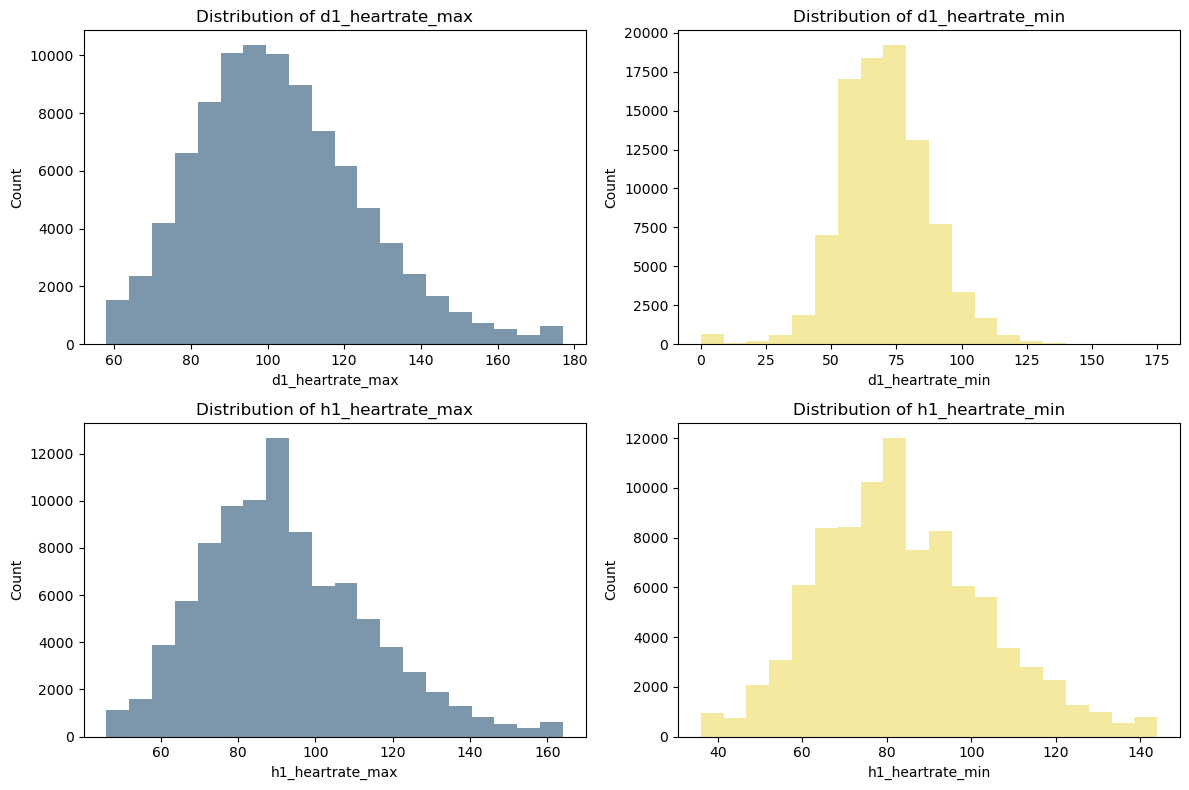

In [65]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_heartrate_max in the first subplot
axes[0, 0].hist(df['d1_heartrate_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_heartrate_max')
axes[0, 0].set_xlabel('d1_heartrate_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_heartrate_min in the second subplot
axes[0, 1].hist(df['d1_heartrate_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_heartrate_min')
axes[0, 1].set_xlabel('d1_heartrate_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_heartrate_max in the third subplot
axes[1, 0].hist(df['h1_heartrate_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_heartrate_max')
axes[1, 0].set_xlabel('h1_heartrate_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_heartrate_min in the third subplot
axes[1, 1].hist(df['h1_heartrate_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_heartrate_min')
axes[1, 1].set_xlabel('h1_heartrate_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

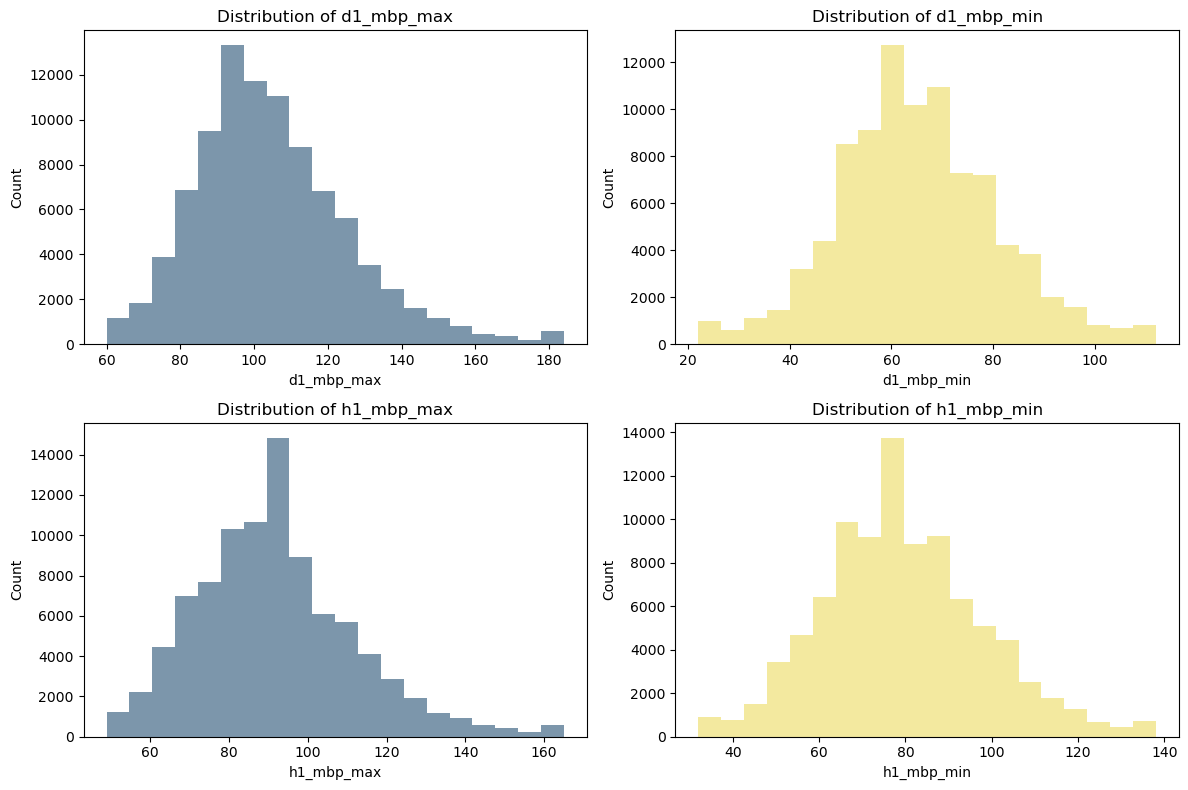

In [66]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_mbp_max in the first subplot
axes[0, 0].hist(df['d1_mbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_mbp_max')
axes[0, 0].set_xlabel('d1_mbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_mbp_min in the second subplot
axes[0, 1].hist(df['d1_mbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_mbp_min')
axes[0, 1].set_xlabel('d1_mbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_mbp_max in the third subplot
axes[1, 0].hist(df['h1_mbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_mbp_max')
axes[1, 0].set_xlabel('h1_mbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_mbp_min in the third subplot
axes[1, 1].hist(df['h1_mbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_mbp_min')
axes[1, 1].set_xlabel('h1_mbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

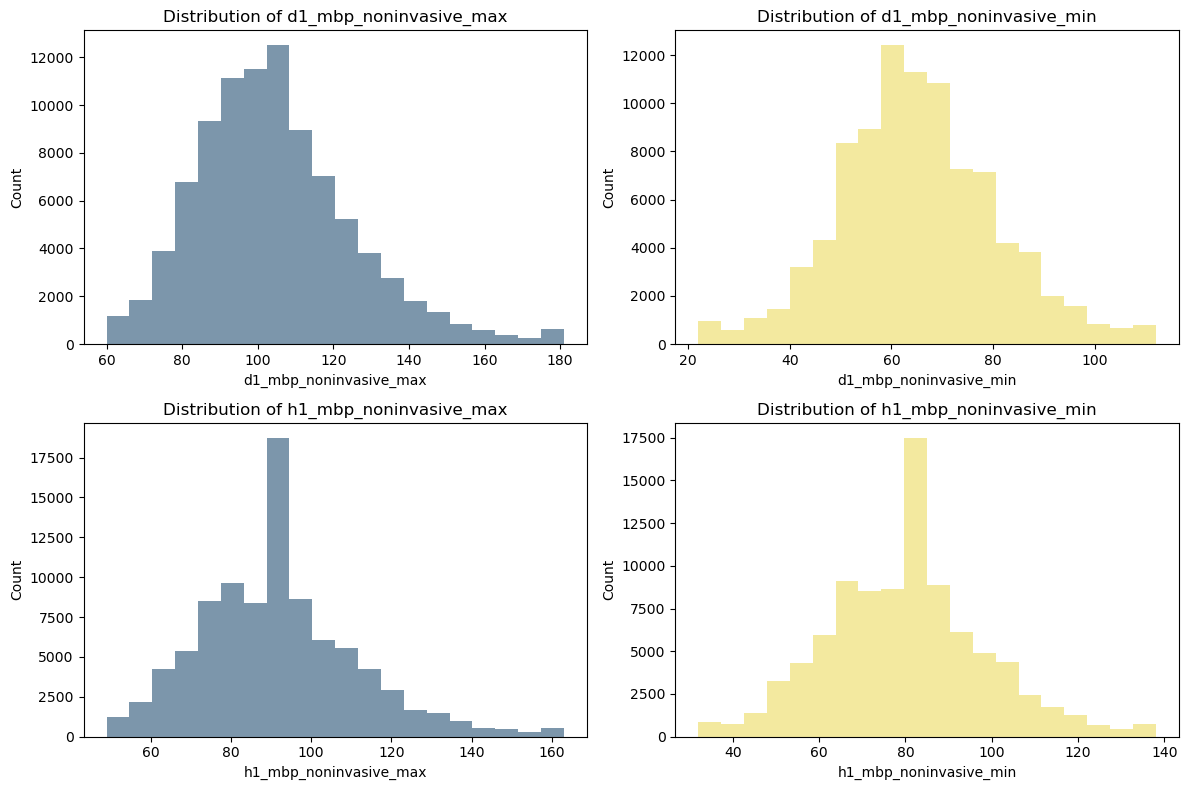

In [67]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_mbp_noninvasive_max in the first subplot
axes[0, 0].hist(df['d1_mbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_mbp_noninvasive_max')
axes[0, 0].set_xlabel('d1_mbp_noninvasive_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_mbp_noninvasive_min in the second subplot
axes[0, 1].hist(df['d1_mbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_mbp_noninvasive_min')
axes[0, 1].set_xlabel('d1_mbp_noninvasive_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_mbp_noninvasive_max in the third subplot
axes[1, 0].hist(df['h1_mbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_mbp_noninvasive_max')
axes[1, 0].set_xlabel('h1_mbp_noninvasive_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_mbp_noninvasive_min in the third subplot
axes[1, 1].hist(df['h1_mbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_mbp_noninvasive_min')
axes[1, 1].set_xlabel('h1_mbp_noninvasive_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

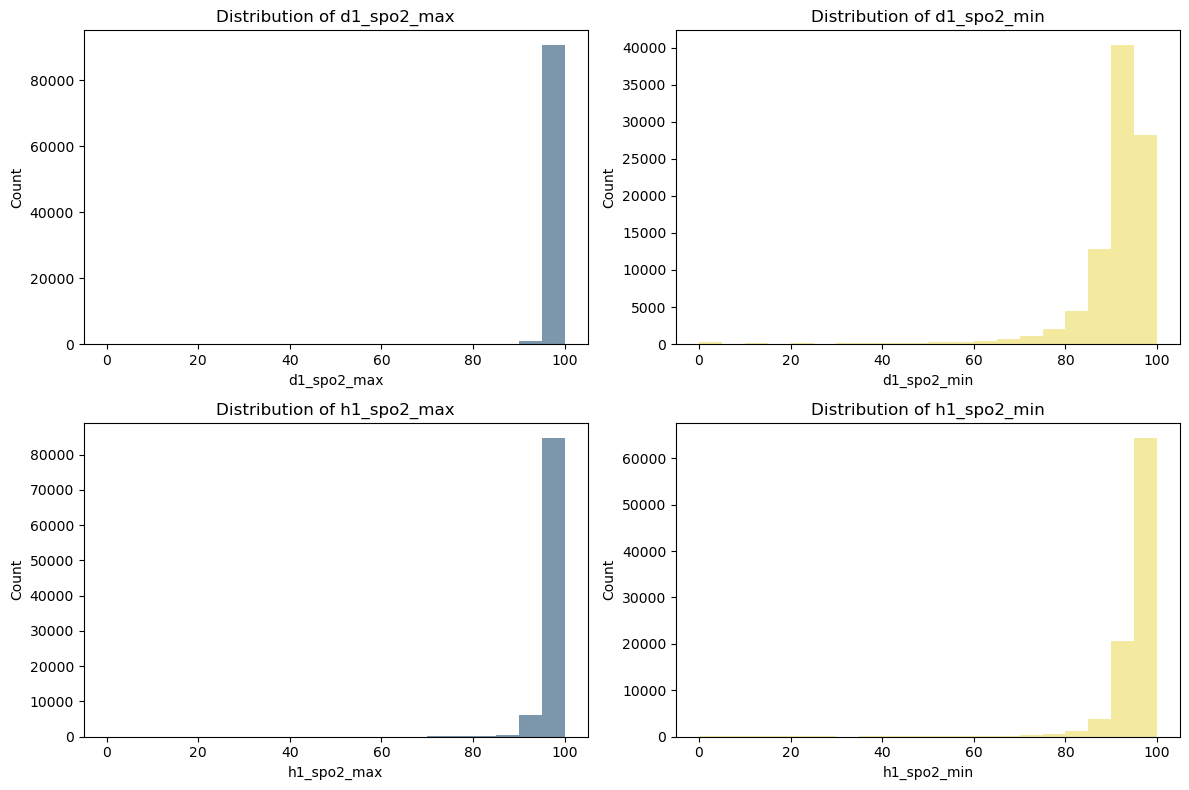

In [68]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_spo2_max in the first subplot
axes[0, 0].hist(df['d1_spo2_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_spo2_max')
axes[0, 0].set_xlabel('d1_spo2_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_spo2_min in the second subplot
axes[0, 1].hist(df['d1_spo2_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_spo2_min')
axes[0, 1].set_xlabel('d1_spo2_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_spo2_max in the third subplot
axes[1, 0].hist(df['h1_spo2_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_spo2_max')
axes[1, 0].set_xlabel('h1_spo2_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_spo2_min in the third subplot
axes[1, 1].hist(df['h1_spo2_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_spo2_min')
axes[1, 1].set_xlabel('h1_spo2_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

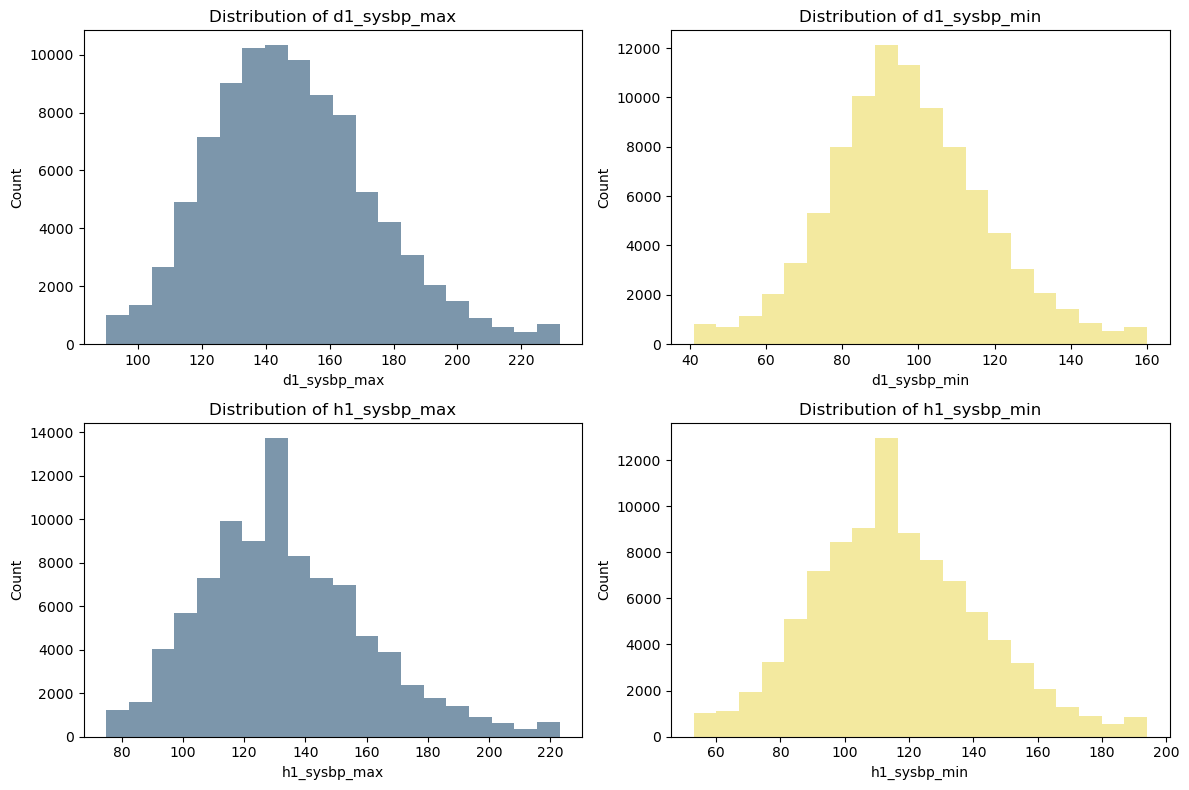

In [69]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_sysbp_max in the first subplot
axes[0, 0].hist(df['d1_sysbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_sysbp_max')
axes[0, 0].set_xlabel('d1_sysbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_sysbp_min in the second subplot
axes[0, 1].hist(df['d1_sysbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_sysbp_min')
axes[0, 1].set_xlabel('d1_sysbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_sysbp_max in the third subplot
axes[1, 0].hist(df['h1_sysbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_sysbp_max')
axes[1, 0].set_xlabel('h1_sysbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_sysbp_min in the third subplot
axes[1, 1].hist(df['h1_sysbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_sysbp_min')
axes[1, 1].set_xlabel('h1_sysbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

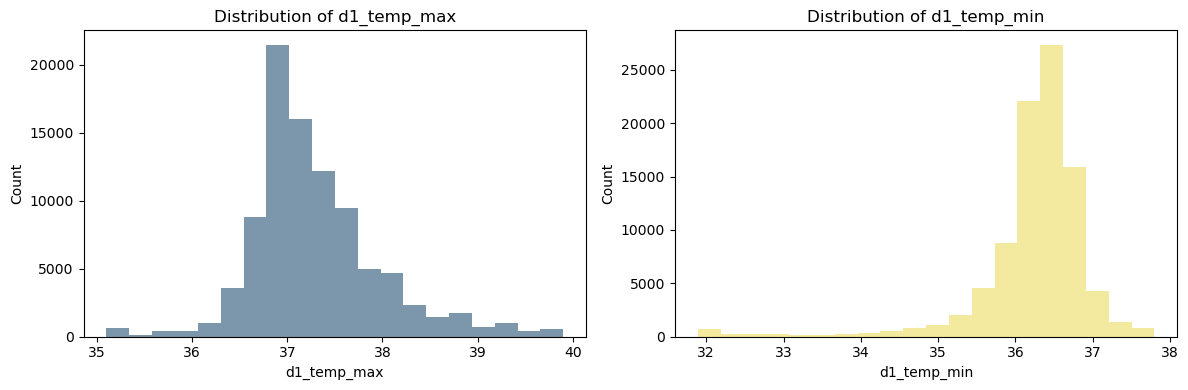

In [70]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_temp_max in the first subplot
axes[0].hist(df['d1_temp_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_temp_max')
axes[0].set_xlabel('d1_temp_max')
axes[0].set_ylabel('Count')

# Plot d1_temp_min in the second subplot
axes[1].hist(df['d1_temp_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_temp_min')
axes[1].set_xlabel('d1_temp_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

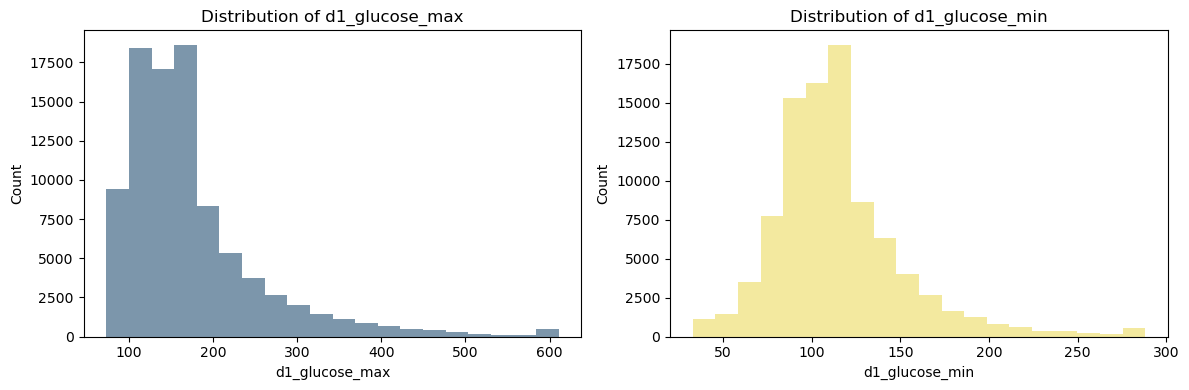

In [71]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_glucose_max in the first subplot
axes[0].hist(df['d1_glucose_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_glucose_max')
axes[0].set_xlabel('d1_glucose_max')
axes[0].set_ylabel('Count')

# Plot d1_glucose_min in the second subplot
axes[1].hist(df['d1_glucose_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_glucose_min')
axes[1].set_xlabel('d1_glucose_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

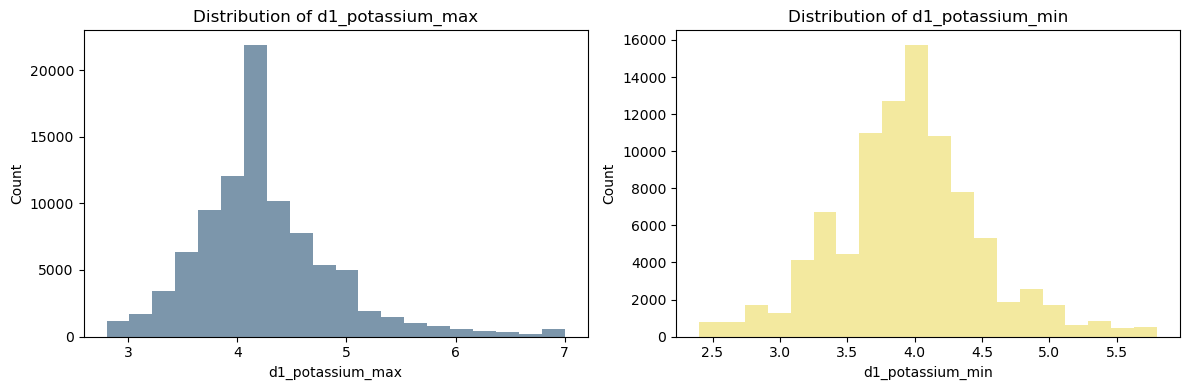

In [72]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_potassium_max in the first subplot
axes[0].hist(df['d1_potassium_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_potassium_max')
axes[0].set_xlabel('d1_potassium_max')
axes[0].set_ylabel('Count')

# Plot d1_potassium_min in the second subplot
axes[1].hist(df['d1_potassium_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_potassium_min')
axes[1].set_xlabel('d1_potassium_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

Text(0.5, 1.0, 'Correlation: 0.88')

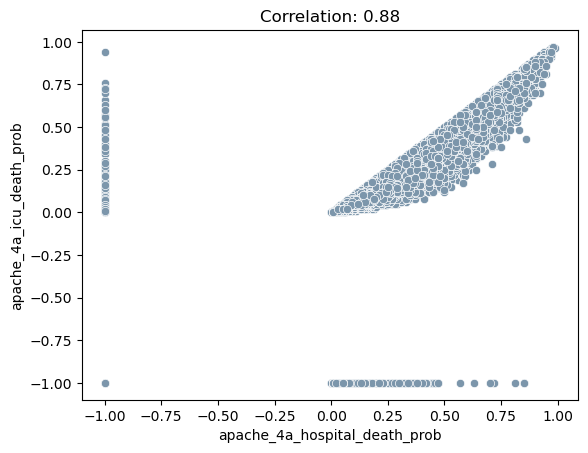

In [73]:
# Create a scatter plot
sns.scatterplot(data=df, x='apache_4a_hospital_death_prob', y='apache_4a_icu_death_prob', color='#7C96AB')

# Add a label to the x-axis
plt.xlabel('apache_4a_hospital_death_prob')

# Add a label to the y-axis
plt.ylabel('apache_4a_icu_death_prob')

# Calculate the correlation coefficient between the two variables
correlation = df['apache_4a_hospital_death_prob'].corr(df['apache_4a_icu_death_prob'])

# Set the plot's title to display the calculated correlation
plt.title(f'Correlation: {correlation:.2f}')

In [74]:
# How many times each unique value appears in aids column
df['aids'].value_counts()

0.000000    90920
0.000857      715
1.000000       78
Name: aids, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by aids')

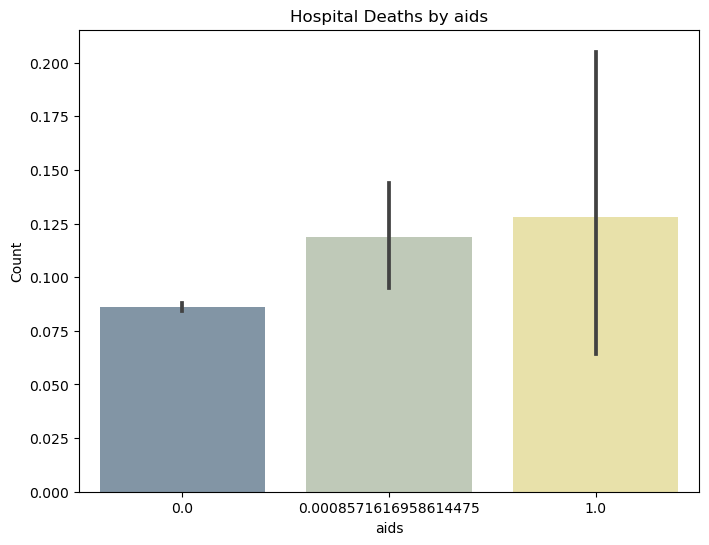

In [75]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='aids', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('aids')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by aids')

In [76]:
# How many times each unique value appears in cirrhosis column
df['cirrhosis'].value_counts()

0.000000    89570
1.000000     1428
0.015693      715
Name: cirrhosis, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by cirrhosis')

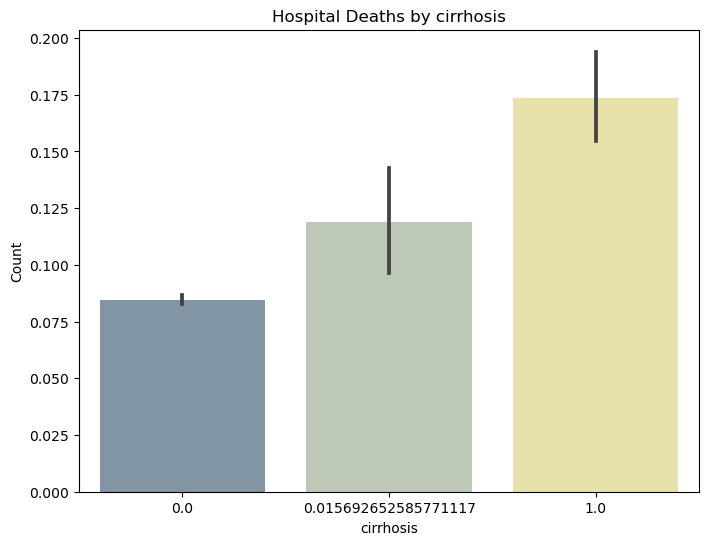

In [77]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='cirrhosis', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('cirrhosis')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by cirrhosis')

In [78]:
# How many times each unique value appears in diabetes_mellitus column
df['diabetes_mellitus'].value_counts()

0.000000    70506
1.000000    20492
0.225192      715
Name: diabetes_mellitus, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by diabetes_mellitus')

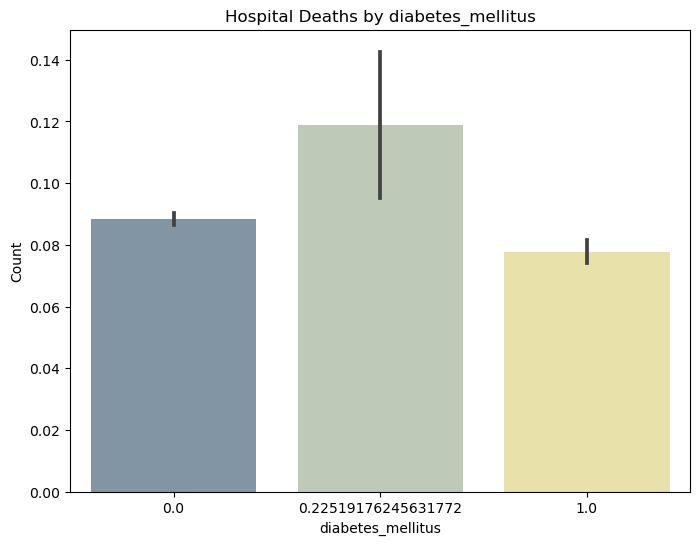

In [79]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='diabetes_mellitus', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('diabetes_mellitus')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by diabetes_mellitus')

In [80]:
# How many times each unique value appears in hepatic_failure column
df['hepatic_failure'].value_counts()

0.000000    89816
1.000000     1182
0.012989      715
Name: hepatic_failure, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by hepatic_failure')

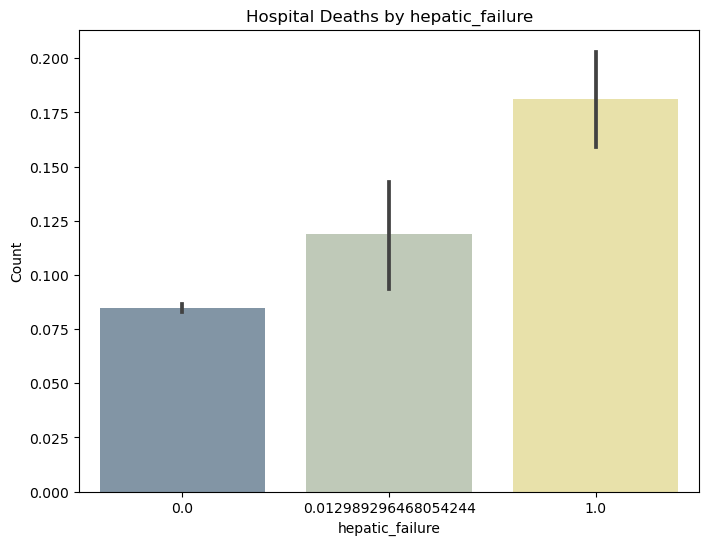

In [81]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='hepatic_failure', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('hepatic_failure')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by hepatic_failure')

In [82]:
# How many times each unique value appears in immunosuppression column
df['immunosuppression'].value_counts()

0.000000    88617
1.000000     2381
0.026165      715
Name: immunosuppression, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by immunosuppression')

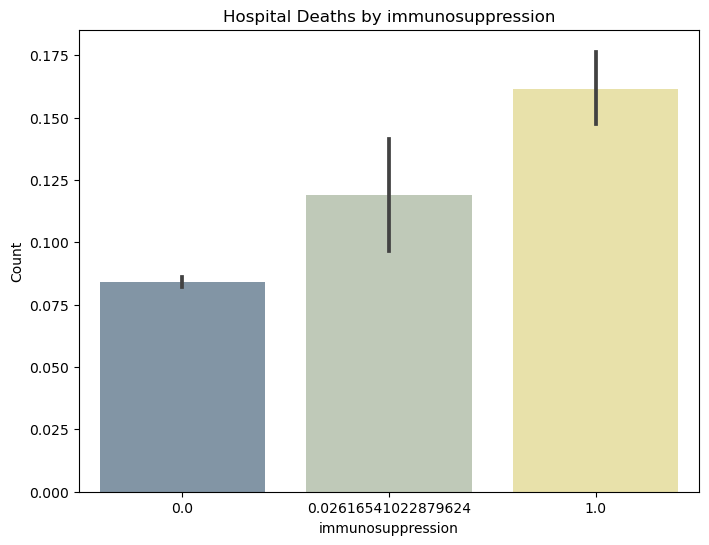

In [83]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='immunosuppression', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('immunosuppression')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by immunosuppression')

In [84]:
# How many times each unique value appears in leukemia column
df['leukemia'].value_counts()

0.000000    90355
0.007066      715
1.000000      643
Name: leukemia, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by leukemia')

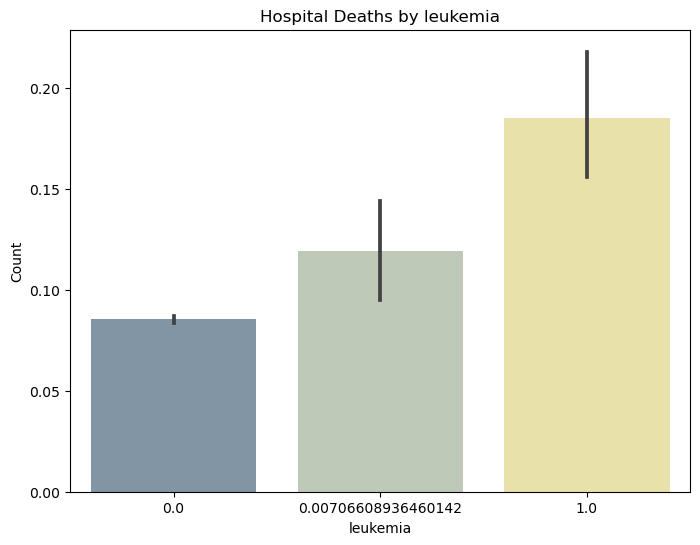

In [85]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='leukemia', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('leukemia')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by leukemia')

In [86]:
# How many times each unique value appears in lymphoma column
df['lymphoma'].value_counts()

0.000000    90622
0.004132      715
1.000000      376
Name: lymphoma, dtype: int64

Text(0.5, 1.0, 'Hospital Deaths by lymphoma')

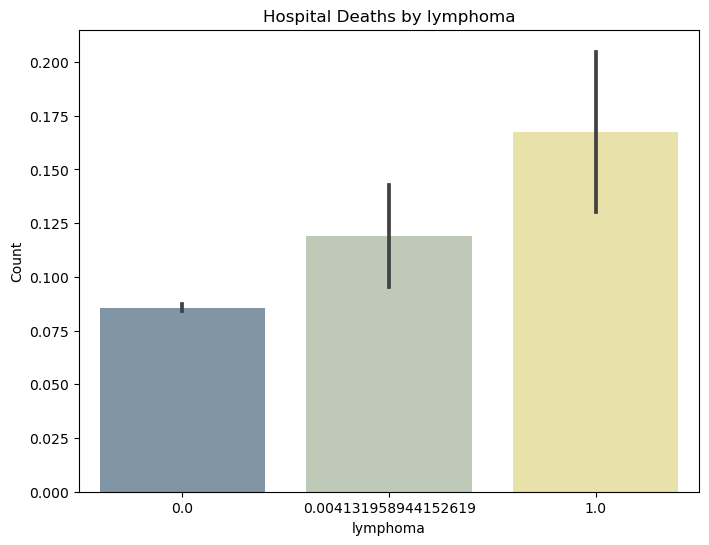

In [87]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='lymphoma', y='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('lymphoma')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by lymphoma')

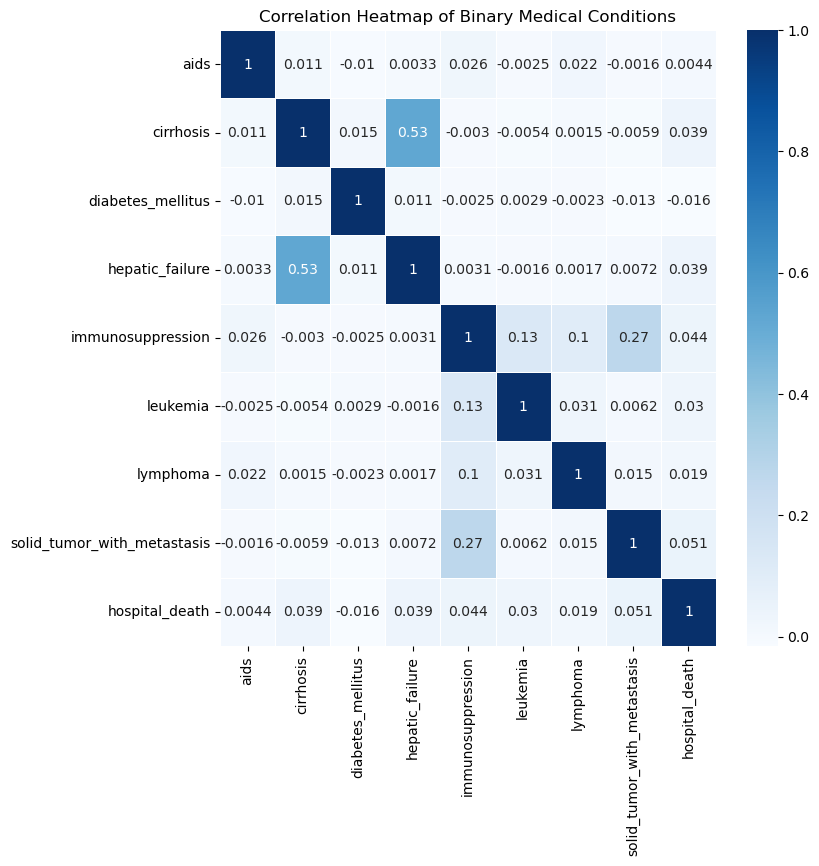

In [88]:
# Select the binary columns
binary_columns = df[['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']]

# Calculate the correlation matrix
correlation_matrix = binary_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Binary Medical Conditions')

# Show the plot
plt.show()

In [90]:
df["apache_2_bodysystem"].value_counts()

Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64

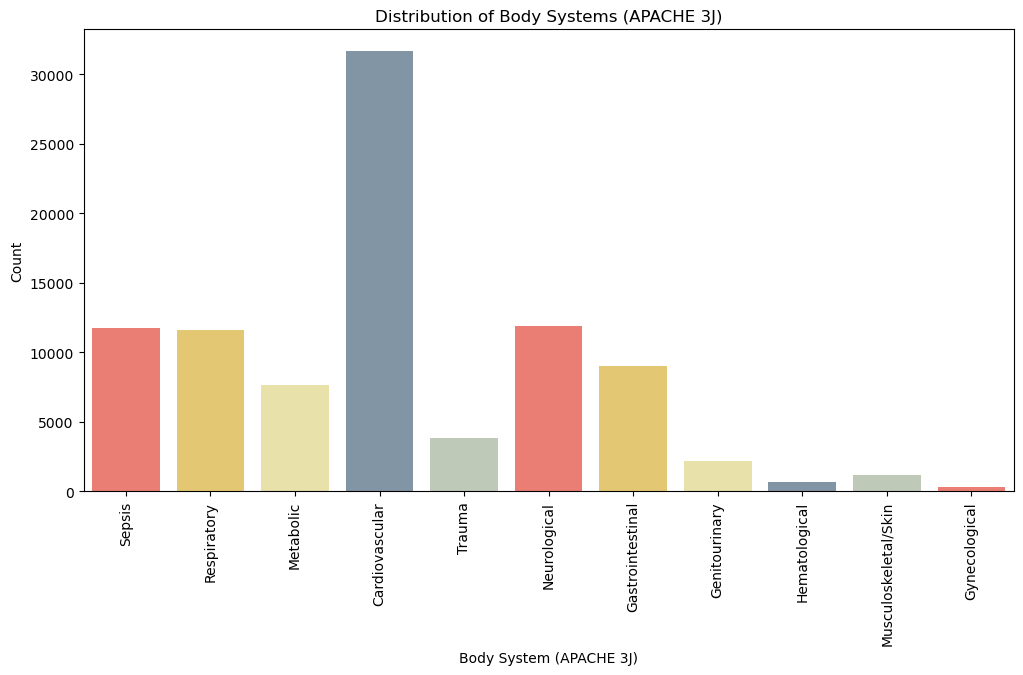

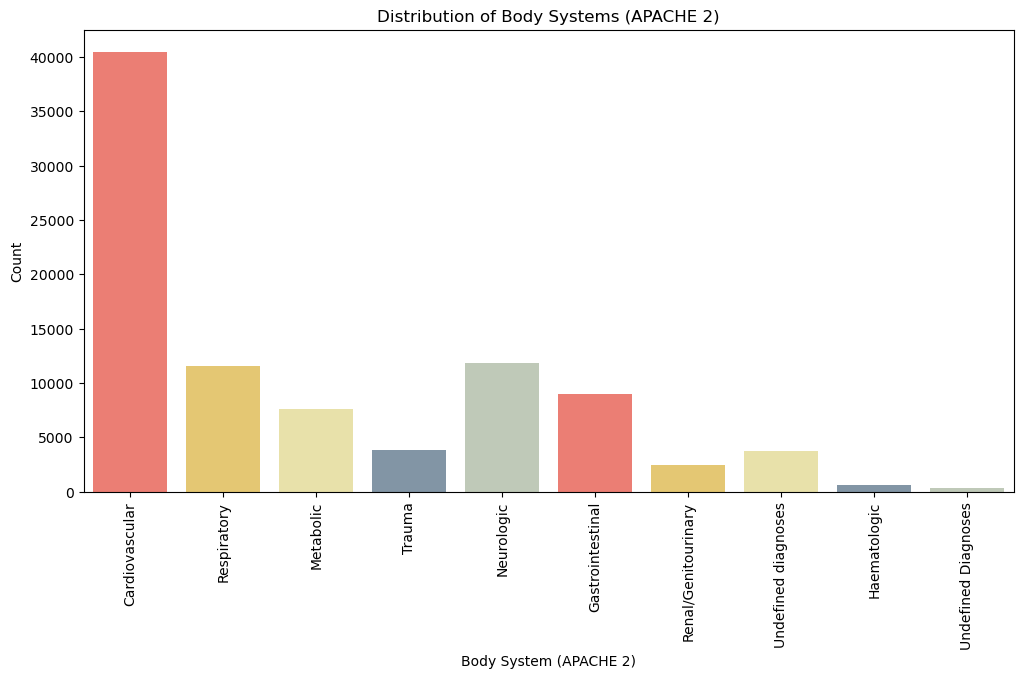

In [91]:
# Create a count plot for 'apache_3j_bodysystem'
plt.figure(figsize=(12, 6))
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#7C96AB', '#BFCCB5']
sns.countplot(data=df, x='apache_3j_bodysystem', palette=custom_palette)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Body System (APACHE 3J)')
plt.ylabel('Count')
plt.title('Distribution of Body Systems (APACHE 3J)')

# Show the plot
plt.show()

# Create a count plot for 'apache_2_bodysystem'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='apache_2_bodysystem', palette=custom_palette)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Body System (APACHE 2)')
plt.ylabel('Count')
plt.title('Distribution of Body Systems (APACHE 2)')

# Show the plot
plt.show()

In [92]:
df["ethnicity"] = df["ethnicity"].replace("Caucasian", 0).replace("African American", 1).replace("Other/Unknown", 2).replace("Hispanic", 3).replace("Asian", 4).replace("Native American", 5)
df["gender"] = df["gender"].replace("M", 0).replace("F", 1)
df["icu_admit_source"] = df["icu_admit_source"].replace("Accident & Emergency", 0).replace("Operating Room / Recovery", 1).replace("Floor", 2).replace("Other Hospital", 3).replace("Other ICU", 4)
df["icu_stay_type"] = df["icu_stay_type"].replace("admit", 0).replace("transfer", 1).replace("readmit", 2)
df["icu_type"] = df["icu_type"].replace("Med-Surg ICU", 0).replace("MICU", 1).replace("Neuro ICU", 2).replace("CCU-CTICU", 3).replace("SICU", 4).replace("Cardiac ICU", 5).replace("CSICU", 6).replace("CTICU", 7)
df["apache_3j_bodysystem"] = df["apache_3j_bodysystem"].replace("Cardiovascular", 0).replace("Neurological", 1).replace("Sepsis", 2).replace("Respiratory", 3).replace("Gastrointestinal", 4).replace("Metabolic", 5).replace("Trauma", 6).replace("Genitourinary", 7).replace("Musculoskeletal/Skin", 8).replace("Hematological", 9).replace("Gynecological", 10)
df["apache_2_bodysystem"] = df["apache_3j_bodysystem"].replace("Cardiovascular", 0).replace("Neurologic", 1).replace("Respiratory", 2).replace("Gastrointestinal", 3).replace("Metabolic", 4).replace("Trauma", 5).replace("Undefined diagnoses", 6).replace("Renal/Genitourinary", 7).replace("Haematologic", 8).replace("Undefined Diagnoses", 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  int64  
 4   gender                         91713 non-null  int64  
 5   height                         91713 non-null  float64
 6   icu_admit_source               91713 non-null  int64  
 7   icu_stay_type                  91713 non-null  int64  
 8   icu_type                       91713 non-null  int64  
 9   pre_icu_los_days               91713 non-null  float64
 10  weight                         91713 non-null  float64
 11  apache_2_diagnosis             91713 non-null  float64
 12  apache_3j_diagnosis            91713 non-null 

# Machine Learning Models

In [94]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1- Logistic Regression

In [95]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

In [96]:
# Split the data into features (X) and the target variable (y).
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Create a logistic regression model and fit it to the training data
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

E:\Programs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
LR_y_pred = LR_model.predict(X_test)

In [100]:
# Confusion matrix
LR_confusion = confusion_matrix(y_test, LR_y_pred)

# Classification report
LR_classification_rep = classification_report(y_test, LR_y_pred)

# Accuracy score
LR_accuracy = accuracy_score(y_test, LR_y_pred)

print("Logistic Regression Confusion Matrix:\n", LR_confusion)
print("\nLogistic Regression Classification Report:\n", LR_classification_rep)
print("\nLogistic Regression Accuracy:", LR_accuracy)

Logistic Regression Confusion Matrix:
 [[16614   142]
 [ 1355   232]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     16756
           1       0.62      0.15      0.24      1587

    accuracy                           0.92     18343
   macro avg       0.77      0.57      0.60     18343
weighted avg       0.90      0.92      0.89     18343


Logistic Regression Accuracy: 0.9183884860709808


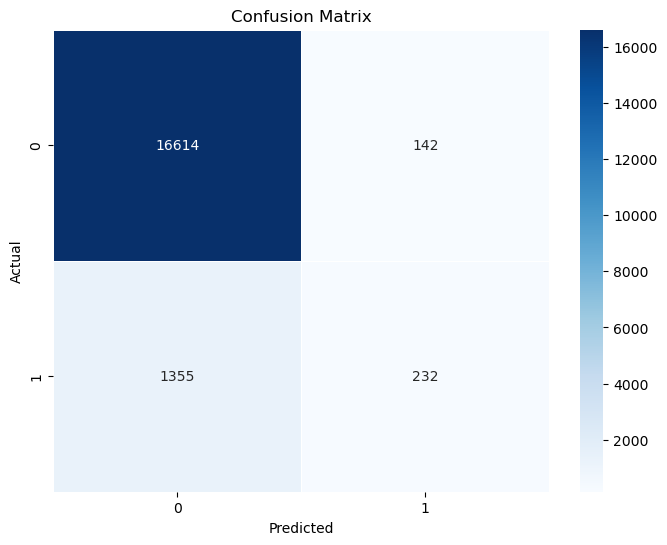

In [101]:
# Confusion matrix
confusion = confusion_matrix(y_test, LR_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2- Decision Tree

In [102]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Create and fit a decision tree classifier
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
# Make predictions using the test set
DT_y_pred = DT_model.predict(X_test)

In [107]:
# Evaluate the model's performance
DT_accuracy = accuracy_score(y_test, DT_y_pred)
DT_classification_rep = classification_report(y_test, DT_y_pred)
DT_confusion = confusion_matrix(y_test, DT_y_pred)

# Print the results
print("Decision Tree Accuracy:", DT_accuracy)
print("\nDecision Tree Classification Report:\n", DT_classification_rep)
print("\nDecision Tree Confusion Matrix:\n", DT_confusion)

Decision Tree Accuracy: 0.8777735375892711

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     16756
           1       0.32      0.36      0.34      1587

    accuracy                           0.88     18343
   macro avg       0.63      0.64      0.63     18343
weighted avg       0.88      0.88      0.88     18343


Decision Tree Confusion Matrix:
 [[15534  1222]
 [ 1020   567]]


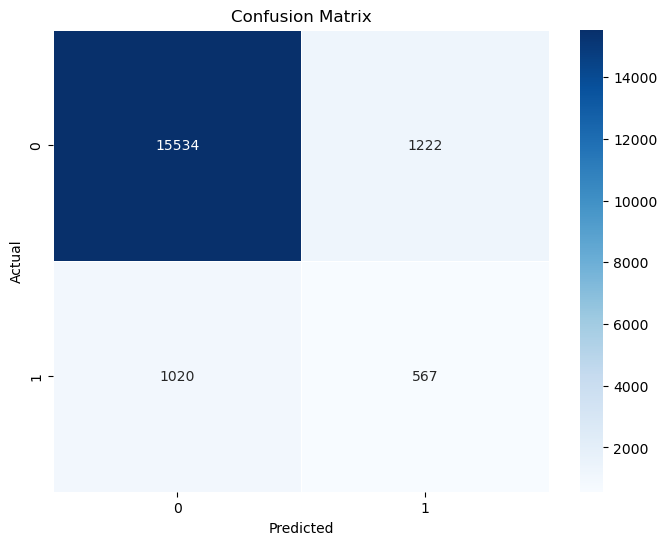

In [108]:
# Confusion matrix
DT_confusion = confusion_matrix(y_test, DT_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3- Random Forest

In [109]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Create and fit a Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
# Make predictions using the test set
RF_y_pred = RF_model.predict(X_test)

In [114]:
# Evaluate the model's performance
RF_accuracy = accuracy_score(y_test, RF_y_pred)
RF_classification_rep = classification_report(y_test, RF_y_pred)
RF_confusion = confusion_matrix(y_test, RF_y_pred)

# Print the results
print("Random Forest Accuracy:", RF_accuracy)
print("\nRandom Forest Classification Report:\n", RF_classification_rep)
print("\nRandom Forest Confusion Matrix:\n", RF_confusion)

Random Forest Accuracy: 0.926293408929837

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.69      0.26      0.38      1587

    accuracy                           0.93     18343
   macro avg       0.81      0.63      0.67     18343
weighted avg       0.91      0.93      0.91     18343


Random Forest Confusion Matrix:
 [[16571   185]
 [ 1167   420]]


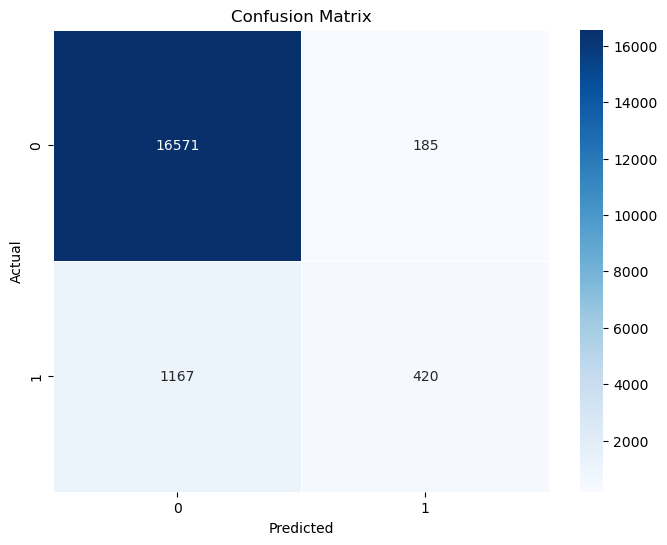

In [115]:
# Confusion matrix
RF_confusion = confusion_matrix(y_test, RF_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(RF_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4- Naive Beyes

In [116]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

In [117]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Create and fit a Gaussian Naive Bayes classifier
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [120]:
# Make predictions using the test set
NB_y_pred = NB_model.predict(X_test)

In [121]:
# Evaluate the model's performance
NB_accuracy = accuracy_score(y_test, NB_y_pred)
NB_classification_rep = classification_report(y_test, NB_y_pred)
NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Print the results
print("Naive Bayes Accuracy:", NB_accuracy)
print("\nNaive Bayes Classification Report:\n", NB_classification_rep)
print("\nNaive Bayes Confusion Matrix:\n", NB_confusion)

Naive Bayes Accuracy: 0.8379218230387614

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     16756
           1       0.29      0.60      0.39      1587

    accuracy                           0.84     18343
   macro avg       0.62      0.73      0.65     18343
weighted avg       0.90      0.84      0.86     18343


Naive Bayes Confusion Matrix:
 [[14423  2333]
 [  640   947]]


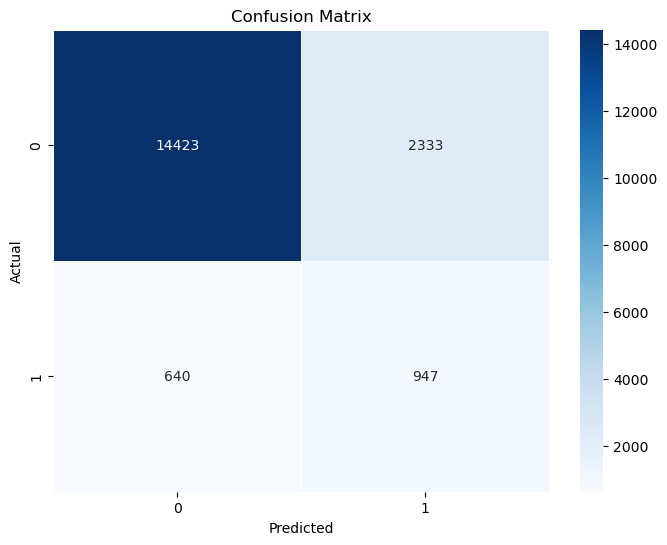

In [122]:
# Confusion matrix
NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(NB_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5- Gradient Boosting

In [123]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# Create and fit a Gradient Boosting Classifier
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [127]:
# Make predictions using the test set
GB_y_pred = GB_model.predict(X_test)

In [128]:
# Evaluate the model's performance
GB_accuracy = accuracy_score(y_test, GB_y_pred)
GB_classification_rep = classification_report(y_test, GB_y_pred)
GB_confusion = confusion_matrix(y_test, GB_y_pred)

# Print the results
print("Gradient Boosting Accuracy:", GB_accuracy)
print("\nGradient Boosting Classification Report:\n", GB_classification_rep)
print("\nGradient Boosting Confusion Matrix:\n", GB_confusion)

Gradient Boosting Accuracy: 0.9264569590579512

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     16756
           1       0.67      0.30      0.41      1587

    accuracy                           0.93     18343
   macro avg       0.80      0.64      0.69     18343
weighted avg       0.91      0.93      0.91     18343


Gradient Boosting Confusion Matrix:
 [[16523   233]
 [ 1116   471]]


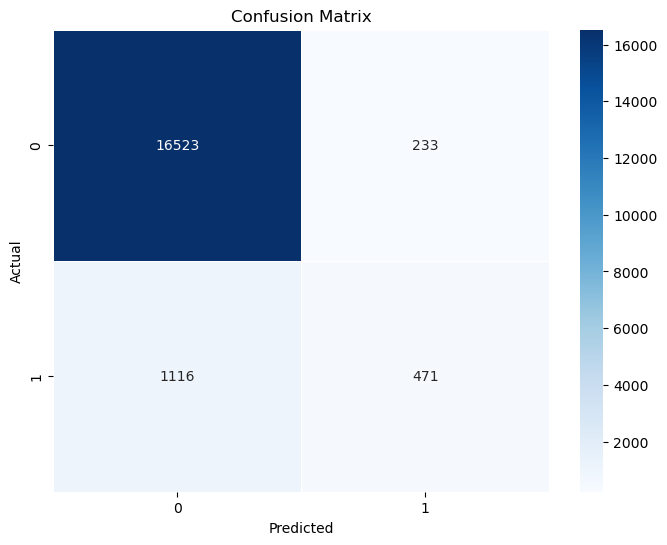

In [129]:
# Confusion matrix
GB_confusion = confusion_matrix(y_test, GB_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(GB_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6- Ensembele Learning

In [130]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Create individual models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [134]:
# Create a Voting Classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('naive_bayes', naive_bayes),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='hard' 
)

In [135]:
# Fit the ensemble model
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('naive_bayes', GaussianNB()),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42))])

In [136]:
# Make predictions using the test set
EL_y_pred = ensemble_classifier.predict(X_test)

In [137]:
# Evaluate the model's performance
EL_accuracy = accuracy_score(y_test, EL_y_pred)
EL_classification_rep = classification_report(y_test, EL_y_pred)
EL_confusion = confusion_matrix(y_test, EL_y_pred)

# Print the results
print("Ensembele Learning Accuracy:", EL_accuracy)
print("\nEnsembele Learning Classification Report:\n", EL_classification_rep)
print("\nEnsembele Learning Confusion Matrix:\n", EL_confusion)

Ensembele Learning Accuracy: 0.9257482418361228

Ensembele Learning Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.67      0.27      0.39      1587

    accuracy                           0.93     18343
   macro avg       0.80      0.63      0.68     18343
weighted avg       0.91      0.93      0.91     18343


Ensembele Learning Confusion Matrix:
 [[16546   210]
 [ 1152   435]]


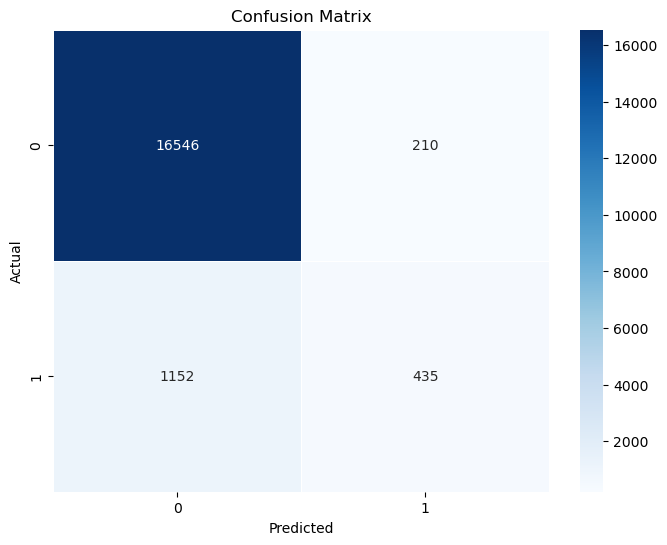

In [138]:
# Confusion matrix
EL_confusion = confusion_matrix(y_test, EL_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(EL_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing the accuracy of machine learning models

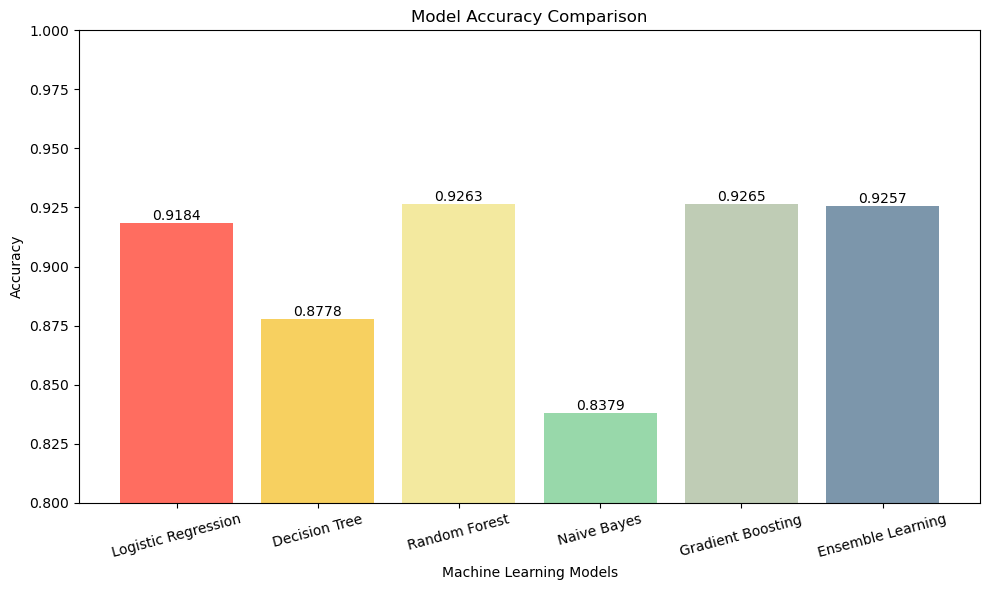

In [140]:
# Names of the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Ensemble Learning']

# Corresponding accuracy scores
accuracy = [0.9184, 0.8778, 0.9263, 0.8379, 0.9265, 0.9257]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set the y-axis limits

# Add accuracy scores to the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=15)  # Rotate the model names for better visibility
plt.tight_layout()
